## Libraries

In [1]:
# import libraries 
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Parameters

In [2]:
# Create an empty graph
G = nx.Graph()

# Add nodes
nodes = range(1, 17)
G.add_nodes_from(nodes)

# Add edges based on the visual structure
edges = [
    (1, 2), (1, 3), (1, 4), (2, 4), (2,5), (3, 4), (3, 6), (3, 7), (3, 8), (4, 5), (4, 8), (4, 9),
    (5, 9), (6, 7), (7, 8), (7, 11), (7, 10), (7, 13), (8, 9), (8, 11), (8, 12), (9, 12),
    (10, 13), (11, 12), (11, 13), (11, 14), (12, 14), (12, 15), (13, 14), (13, 16) ,(14, 15),
    (14, 16), (15, 16)
]
G.add_edges_from(edges)

# Set parameters
alpha = 0.0050415
beta = 0.000013047
delta = 0.0079639
do = 0.0017783
numerator = 2 * delta**2 * beta + do * (alpha + beta)**2 + 2 * (alpha + beta) * delta * np.sqrt(2 * do * (alpha + beta))
denominator = 2 * alpha * delta**2
Ic = numerator / denominator
I = Ic + 0.01

# Critical eigenvalue, must be 1.19198455
lambda_c = (do * (alpha + beta)**2 + 2 * beta * delta**2 - 2 * I * alpha * delta**2) / (4 * do * delta * (alpha + beta))

# Compute the homogeneous steady states
rho_ss = alpha * delta / (alpha + beta)
O_ss = (alpha + beta) / delta
params = {
    'alpha': alpha,
    'beta': beta,
    'delta': delta,
    'do': do,
    'I': I,
    'rho_ss': rho_ss,
    'O_ss': O_ss,
    'lambda_c': lambda_c
}

In [3]:
params

{'alpha': 0.0050415,
 'beta': 1.3047e-05,
 'delta': 0.0079639,
 'do': 0.0017783,
 'I': np.float64(0.6174034423516578),
 'rho_ss': 0.007943343261028139,
 'O_ss': 0.6346823792363039,
 'lambda_c': np.float64(-1.2144640658690309)}

## Dispertion Relation

In [4]:
def dispertion_relation(params, plot=False, eigenvalues: list=None, index_critical_eigenvalue: int=None):
    """
    Function to get the dispersion relation of the graph
    """
    # Parameters
    alpha = params['alpha']
    beta = params['beta']
    delta = params['delta']
    do = params['do']
    I = params['I']
    rho_ss = params['rho_ss']
    O_ss = params['O_ss']
    lambda_c = params['lambda_c']
    
        # Define a suitable range of lambda values
    lambda_vals = np.linspace(-8, 0, 500)

    # b(λ)
    def b(lambda_N):
        return ((alpha + beta)/delta
                + (delta * beta)/(alpha + beta)
                - lambda_N * (2 + do))

    # c(λ)
    def c(lambda_N):
        return (
            2 * do * (lambda_N**2)
            + lambda_N * (
                (2 * I * alpha * delta) / (alpha + beta)
                - (2 * delta * beta) / (alpha + beta)
                - (do * (alpha + beta)) / delta
            )
            + (alpha + beta)
        )

    # η(λ) = -b(λ)/2 + (1/2)*sqrt(b(λ)^2 - 4 c(λ))
    def eta(lambda_N):
        return -0.5 * b(lambda_N) + 0.5 * np.sqrt(b(lambda_N)**2 - 4 * c(lambda_N))

    # Evaluate eta on the grid of lambda values
    eta_vals = eta(lambda_vals)

    # Extract only the real part
    eta_vals_real = np.real(eta_vals)

    # Determine the range for positive values
    positive_range = np.where(eta_vals_real > 0)[0]

    min_lambda = lambda_vals[positive_range[0]]
    max_lambda = lambda_vals[positive_range[-1]]

    if plot: 
        # Plot the real part of eta vs. lambda
        plt.figure()
        plt.plot(lambda_vals, eta_vals_real, label=r'Real[$\eta(\lambda)$]')
        # Graph a horizontal line at 0
        plt.axhline(0, color='black', linestyle='-')
        
        # Plot eigenvalues if provided
        if eigenvalues is not None:
            # Plot eigenvalues as asterisks on x-axis
            plt.plot(eigenvalues, [0] * len(eigenvalues), '*', color='red', 
                    markersize=10, label='Eigenvalues')
            
            # If index of critical eigenvalue is provided, highlight it
            if index_critical_eigenvalue is not None:
                plt.plot(eigenvalues[index_critical_eigenvalue], 0, '*', 
                        color='green', markersize=15, 
                        label='Critical Eigenvalue')
        
        plt.xlabel(r'$\lambda$')
        plt.ylabel(r'Real[$\eta(\lambda)$]')
        plt.title('Dispersion Relation')
        plt.legend()
        plt.grid(True)
        plt.show()

    return {
        'min_lambda': float(min_lambda),
        'max_lambda': float(max_lambda),
    }

    

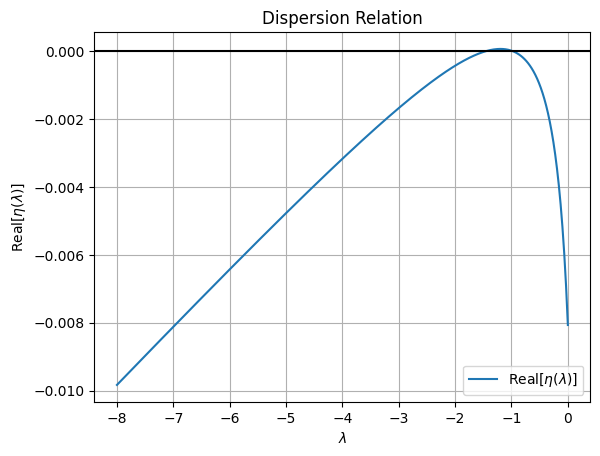

{'min_lambda': -1.4428857715430867, 'max_lambda': -0.9939879759519048}

In [5]:
dispertion_relation(params, plot=True)

## Dynamics

In [6]:
n = 16
y = np.array([0.1, 0.2] * n)
print(y)
y_reshape = y.reshape(n, 2)
print(y_reshape)

[0.1 0.2 0.1 0.2 0.1 0.2 0.1 0.2 0.1 0.2 0.1 0.2 0.1 0.2 0.1 0.2 0.1 0.2
 0.1 0.2 0.1 0.2 0.1 0.2 0.1 0.2 0.1 0.2 0.1 0.2 0.1 0.2]
[[0.1 0.2]
 [0.1 0.2]
 [0.1 0.2]
 [0.1 0.2]
 [0.1 0.2]
 [0.1 0.2]
 [0.1 0.2]
 [0.1 0.2]
 [0.1 0.2]
 [0.1 0.2]
 [0.1 0.2]
 [0.1 0.2]
 [0.1 0.2]
 [0.1 0.2]
 [0.1 0.2]
 [0.1 0.2]]


In [7]:
# Set of functions



def get_dynamics(graph, params, plot=False, hard_integration=False):
    """
    Function to get the dynamics of the graph
    """
    # Parameters
    alpha = params['alpha']
    beta = params['beta']
    delta = params['delta']
    do = params['do']
    I = params['I']
    rho_ss = params['rho_ss']
    O_ss = params['O_ss']
    lambda_c = params['lambda_c']
    G = graph
    n = G.number_of_nodes()
    e = G.number_of_edges()
    A = nx.adjacency_matrix(G).todense()

    
    def system(t, y, A, alpha, beta, delta, do, I):
        """
        y[k][0] is rho
        y[k][1] is O
        n repetitions for each municipality
        2 variables, rho and O
        """


        y = y.reshape(n, 2)
        
        dydt = np.zeros_like(y)

        

        def function_1(j):
            return A[i][j] * (y[j][0] - y[i][0])
        
        def function_2(j):
            return A[i][j] * ((y[i][1]/y[j][1])**I * y[j][0] - (y[j][1]/y[i][1])**I * y[i][0])
        
        def function_3(j):
            return A[i][j] * (y[j][1] - y[i][1])
        
        j = np.arange(16)
        

        for i in range(n):
            f_1_j = np.vectorize(function_1)(j)
            f_2_j = np.vectorize(function_2)(j)
            f_3_j = np.vectorize(function_3)(j)
            dydt[i, 0] = -y[i, 0] * y[i, 1] + alpha + np.sum(f_1_j) + np.sum(f_2_j)
            dydt[i, 1] = -delta * y[i, 1] + beta + y[i, 0] * y[i, 1] + do * np.sum(f_3_j)

        return dydt.flatten()
    # Initial conditions
    np.random.seed(0)
    y0 = np.array([rho_ss, O_ss] * n) + np.random.uniform(-0.01, 0.01, n * 2) * np.array([rho_ss, O_ss] * n)

    # Time span
    t_span = (0, 1000)
    

    # Solve the system of ODEs
    print("Starting the integration...")
    if hard_integration:
        t_eval = np.linspace(*t_span, 10000)
        solution = sp.integrate.solve_ivp(system, t_span, y0, method='RK45', args=(A, alpha, beta, delta, do, I), t_eval=t_eval)
    else:
        t_eval = np.linspace(*t_span, 1000)
        solution = sp.integrate.solve_ivp(system, t_span, y0, method='BDF', args=(A, alpha, beta, delta, do, I), t_eval=t_eval)


    print("Integration finished.")

    t = solution.t
    y = solution.y.reshape(n, 2, -1)

    # Extract the stationary state from the dynamics (the last values)
    nodes = np.arange(1, n + 1)
    last_values_rho = np.zeros(n)
    last_values_O = np.zeros(n)
    for i in range(n):
        last_values_rho[i] = y[i, 0][-1]
        last_values_O[i] = y[i, 1][-1]

    print("Linear algebra computations...")
    # Computing the spectrum of the Laplacian matrix
    L = -1 * nx.laplacian_matrix(G).todense()

    eigenvalues, eigenvectors = np.linalg.eig(L)
    # sort eigenvalues and eigenvectors
    idx = eigenvalues.argsort()
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]

    # get the index of the nearest eigenvalue to lambda_c
    index_lambda_c = np.argmin(np.abs(eigenvalues - lambda_c))
    # the index cannot be zero 
    min_lambda, max_lambda = dispertion_relation(params).values()
    # check if the index is in the range
    critical_eigenvalue = eigenvalues[index_lambda_c]
    linear_analysis = True
    
    if critical_eigenvalue < min_lambda or critical_eigenvalue > max_lambda:
        linear_analysis = False
    
    if linear_analysis:
        critical_eigenvector = eigenvectors[:, index_lambda_c]
        
    else: 
        # set critical eigenvector as zero vector
        critical_eigenvector = None
        print("The critical eigenvalue is not in the range of the dispersion relation.")
        print("The linear analysis cannot be performed.")
        print("The critical eigenvalue is: ", critical_eigenvalue)

    dispertion_relation(params, plot=plot, eigenvalues=eigenvalues, index_critical_eigenvalue=index_lambda_c)
    
    # Inverse Participation Ratio (IPR)
    ipr_rho = np.sum(last_values_rho**4) / (np.sum(last_values_rho**2)**2)
    ipr_O = np.sum(last_values_O**4) / (np.sum(last_values_O**2)**2)

    if linear_analysis and critical_eigenvector is not None:
        ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)
        variance_eigenvector = float(np.var(critical_eigenvector))
    else:
        # Mark as "no data" for this realization
        ipr_eigenvector = np.nan
        variance_eigenvector = np.nan
        critical_eigenvector = np.zeros(n)  # only for shapes / optional plots

    # IPR of all eigenvectors
    IPR_all_eigenvectors = [np.sum(eigenvectors[:, i]**4) / (np.sum(eigenvectors[:, i]**2)**2) for i in range(n)]

    if plot:
        
        # Creating the stem plots
        fig, axes = plt.subplots(4, 1, figsize=(10, 10))

        # Plot eigenvalues vs IPR
        axes[0].plot(eigenvalues, IPR_all_eigenvectors, 'ko-')
        # Mark critical eigenvalue with green star
        axes[0].plot(eigenvalues[index_lambda_c], IPR_all_eigenvectors[index_lambda_c], 'g*', markersize=15, label='Critical eigenvalue')
        axes[0].set_xlabel('Eigenvalues')
        axes[0].set_ylabel('IPR')
        axes[0].legend()

        # Stem plots
        axes[1].stem(nodes, last_values_rho, linefmt='gray', markerfmt='ko', basefmt=' ', bottom=rho_ss)
        axes[1].axhline(rho_ss, color='red', linestyle='--')


        # Labeling the axes
        axes[1].set_xlabel('Nodes')
        axes[1].set_ylabel(r'$\rho$')

        

        # Stem plots
        axes[2].stem(nodes, last_values_O, linefmt='gray', markerfmt='ko', basefmt=' ', bottom=O_ss)
        axes[2].axhline(O_ss, color='red', linestyle='--')

        # Labeling the axes
        axes[2].set_xlabel('Nodes')
        axes[2].set_ylabel(r'$O$')

        axes[3].stem(nodes, critical_eigenvector, linefmt='gray', markerfmt='ko', basefmt=' ')
        axes[3].axhline(0, color='red', linestyle='--')

        # Labeling the axes
        axes[3].set_xlabel('Nodes')
        axes[3].set_ylabel('Eigenvector')

        # Make some space between the subplots
        plt.tight_layout()
        # Display the plot
        plt.show()

    # Variance 
    variance_rho = np.var(last_values_rho)
    variance_O = np.var(last_values_O)

    

    # Network average degree
    k_avg = 2 * e / n

    # Degree of each node 
    degrees = np.array([val for (node, val) in G.degree()])
    
    # Local clustering for each node 
    clustering_coeffs = np.array([val for (node, val) in nx.clustering(G).items()])
    avg_clustering = np.mean(clustering_coeffs)

    # Probability distribution based on value of eigenvectors
    P_i = np.array([[z ** 2/np.sum(eigenvectors[:, i] ** 2) for z in eigenvectors[:, i]] for i in range(n)])

    # Compute weighted average degree and clustering
    weighted_k_avg = np.array([np.sum(degrees * P_i[i]) for i in range(n)])
    weighted_clustering = np.array([np.sum(clustering_coeffs * P_i[i]) for i in range(n)])



    print("Computations finished.")
    
    # Plot avg degree and clustering vs eigenvalues
    if plot:
        # First plot: Weighted Average Degree
        plt.figure(figsize=(10, 4))
        plt.plot(eigenvalues/k_avg, weighted_k_avg/k_avg, 'ko-')
        plt.axvline(x=-1, color='black', linestyle='--')
        plt.axhline(y=1, color='black', linestyle='--')
        plt.xlabel(r'$\lambda/\langle k \rangle$')
        plt.ylabel(r'$\langle k_c \rangle/\langle k \rangle$')
        plt.grid(True)
        plt.show()

        # Second plot: Weighted Clustering
        plt.figure(figsize=(10, 4))
        plt.plot(eigenvalues/k_avg, weighted_clustering/avg_clustering, 'ko-')
        plt.axvline(x=-1, color='black', linestyle='--')
        plt.axhline(y=1, color='black', linestyle='--')
        plt.xlabel(r'$\lambda/\langle k \rangle$')
        plt.ylabel(r'$\langle C_c \rangle/\langle C \rangle$')
        plt.grid(True)
        plt.show()


    # Return the results
    return {
        'critical_eigenvalue': float(eigenvalues[index_lambda_c]),
        'last_values_rho': last_values_rho.tolist(),
        'last_values_O': last_values_O.tolist(),
        'critical_eigenvector': critical_eigenvector.tolist() if critical_eigenvector is not None else None,
        'eigenvalues': eigenvalues.tolist(),
        'variance_rho': float(variance_rho),
        'variance_O': float(variance_O),
        'variance_eigenvector': variance_eigenvector,
        'ipr_rho': float(ipr_rho),
        'ipr_O': float(ipr_O),
        'ipr_eigenvector': ipr_eigenvector,
        'k_avg': float(k_avg),
        'avg_clustering': float(avg_clustering),
        'weighted_k_avg': weighted_k_avg.tolist(),
        'weighted_clustering': weighted_clustering.tolist(),
        'linear_analysis': linear_analysis,   # <-- add this
    }

        


        


    

Starting the integration...
Integration finished.
Linear algebra computations...


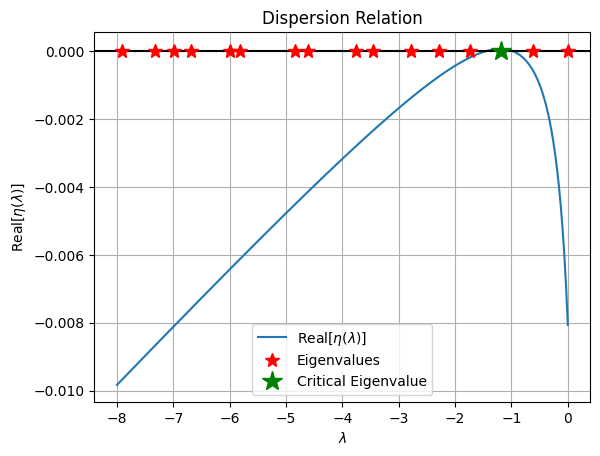

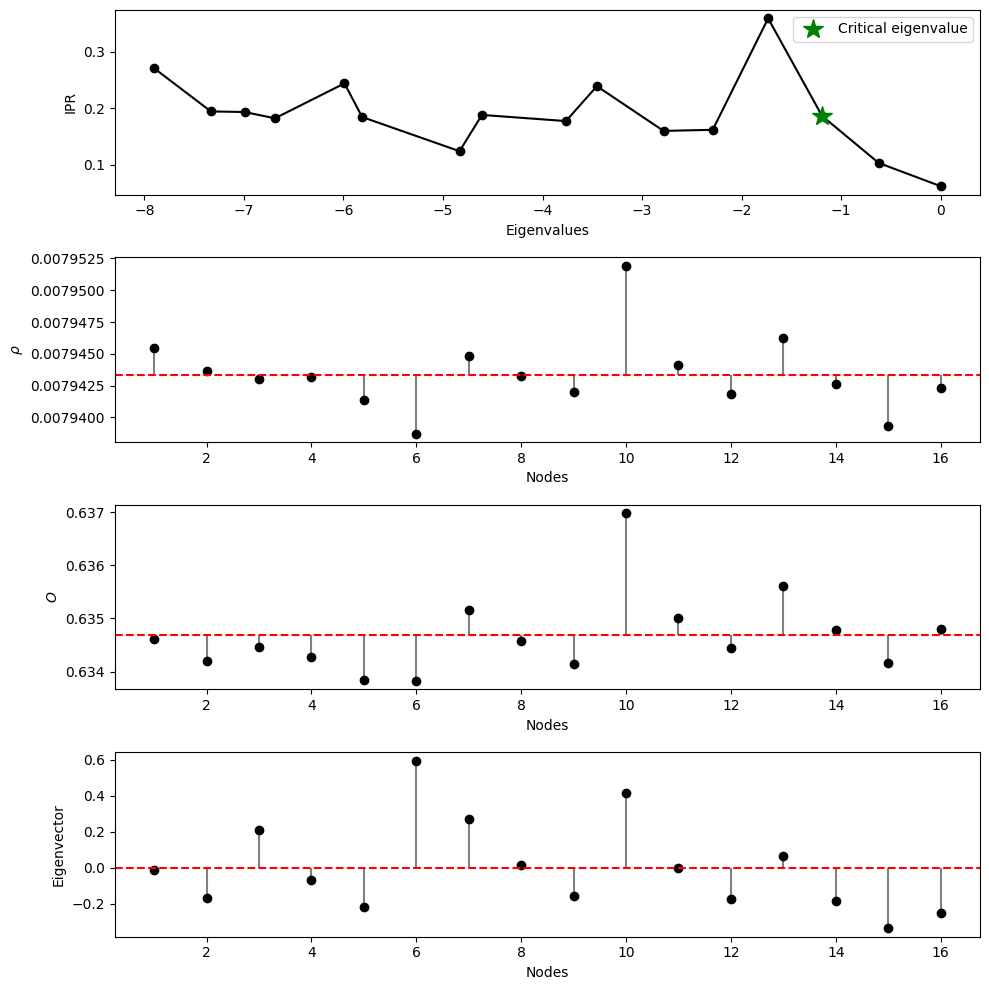

Computations finished.


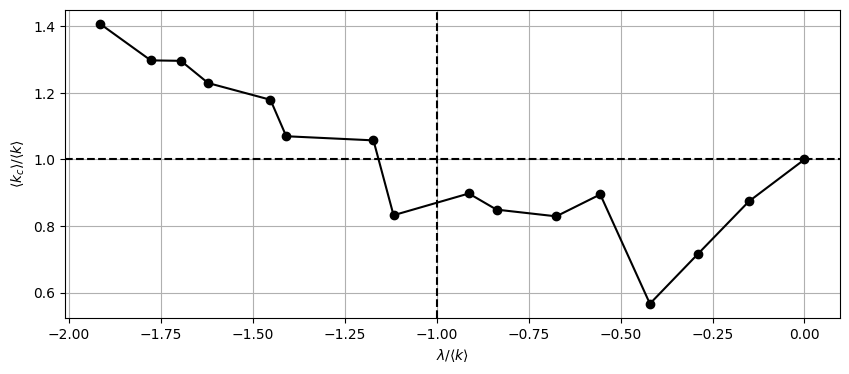

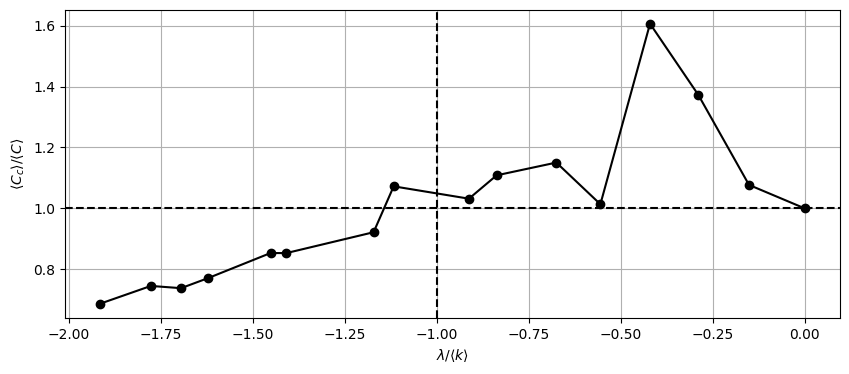

{'critical_eigenvalue': -1.192131278815221,
 'last_values_rho': [0.007945472211205371,
  0.00794362540273758,
  0.007943005525489762,
  0.007943172655327076,
  0.007941395128214223,
  0.007938723966279843,
  0.00794484804183678,
  0.007943234788930737,
  0.007941967850232523,
  0.007951924259517983,
  0.00794414812752333,
  0.007941797877884512,
  0.007946237269305436,
  0.007942607879562481,
  0.007939350571702081,
  0.007942324651208985],
 'last_values_O': [0.6346161371325252,
  0.6342039107940479,
  0.6344564289786411,
  0.6342795385730391,
  0.6338421951331933,
  0.633822674733335,
  0.6351662552805102,
  0.6345828717121182,
  0.6341465426207614,
  0.6369816732019237,
  0.635006993763487,
  0.6344370384302396,
  0.6356045582439367,
  0.6347840169081829,
  0.6341548213721993,
  0.6348013105640803],
 'critical_eigenvector': [-0.014136992519184132,
  -0.16672971189158284,
  0.21017903177304467,
  -0.06900714646851831,
  -0.2182812920332394,
  0.5960491453376587,
  0.27135042903417467,

In [8]:
get_dynamics(G, params, plot=True, hard_integration=False)

## Experiments

In [51]:
# Create the experiments

def experiments(n_nodes, n_neighbors, n_experiments, sample_size, params):
    print("Starting the experiments...")
    transitivity = []
    average_path_length = []
    p_values = np.logspace(-4, 0, n_experiments)
    small_world_graphs = []

    # List that will contain the dynamics of the graphs
    dynamics_data = {}
    # Max clustering coefficient
    max_clustering = 3/4 * (n_neighbors - 2) / (n_neighbors - 1)
    # Max length
    max_length = n_nodes / (2 * n_neighbors)

    # Compute the transitivity and average length path for each graph
    for i, p in enumerate(p_values):
        print(f"Computing graph {i + 1}/{n_experiments}...")
        small_world_graphs = []
        transitivities = []
        avg_lenghts = []
        dynamics = []
        print("Computing samples...")
        for seed in range(sample_size):
            small_world_graphs.append(nx.newman_watts_strogatz_graph(n=n_nodes, k=n_neighbors, p=p, seed=seed))
        print("Computing dynamics...")
        transitivities = list(map(lambda x: nx.transitivity(x) / max_clustering, small_world_graphs))
        avg_lenghts = list(map(lambda x: nx.average_shortest_path_length(x) / max_length, small_world_graphs))  
        dynamics = list(map(lambda x: get_dynamics(x, params), small_world_graphs))
        
        
        transitivity.append(np.mean(transitivities))
        average_path_length.append(np.mean(avg_lenghts))
        dynamics_data[p] = dynamics

    # Save the data for each p
    data_ipr_rho = sum([list(map(lambda x: x['ipr_rho'], dynamics_data[p])) for p in p_values], [])
    data_ipr_O = sum([list(map(lambda x: x['ipr_O'], dynamics_data[p])) for p in p_values], [])
    data_ipr_eigenvector = sum([list(map(lambda x: x['ipr_eigenvector'], dynamics_data[p])) for p in p_values], [])
    data_variance_rho = sum([list(map(lambda x: x['variance_rho'], dynamics_data[p])) for p in p_values], [])
    data_variance_O = sum([list(map(lambda x: x['variance_O'], dynamics_data[p])) for p in p_values], [])
    data_variance_eigenvector = sum([list(map(lambda x: x['variance_eigenvector'], dynamics_data[p])) for p in p_values], [])
    data_k_avg = sum([list(map(lambda x: x['k_avg'], dynamics_data[p])) for p in p_values], [])
    
    data_p = sum([[p] * sample_size for p in p_values], [])

    # Plot the results
    print("Plotting the results...")
    fig, axes = plt.subplots(5, 1, figsize=(10, 12))

    # Plot transitivity and average path length
    axes[0].plot(p_values, transitivity, label='Transitivity')
    axes[0].plot(p_values, average_path_length, label='Average Path Length')
    axes[0].set_xlabel('p')
    axes[0].set_xscale('log')
    axes[0].legend()
    axes[0].set_title('Transitivity and Average Path Length')
    axes[0].grid(True)

    # Plot dynamics: IPR
    axes[1].scatter(data_p, data_ipr_rho, label='IPR rho', alpha=0.7)
    axes[1].scatter(data_p, data_ipr_O, label='IPR O', alpha=0.7)
    axes[1].set_xlabel('p')
    axes[1].set_xscale('log')
    axes[1].legend()
    axes[1].set_title('Dynamics: IPR')
    axes[1].grid(True)

    # Plot variance
    axes[2].scatter(data_p, data_variance_rho, label='Variance rho', alpha=0.7)
    axes[2].scatter(data_p, data_variance_O, label='Variance O', alpha=0.7)
    axes[2].set_xlabel('p')
    axes[2].set_xscale('log')
    axes[2].legend()
    axes[2].set_title('Variance')
    axes[2].grid(True)

    # Plot IPR eigenvector
    axes[3].scatter(data_p, data_ipr_eigenvector, label='IPR eigenvector', alpha=0.7)
    axes[3].set_xlabel('p')
    axes[3].set_xscale('log')
    axes[3].legend()
    axes[3].set_title('IPR Eigenvector')
    axes[3].grid(True)

    # Plot variance eigenvector
    axes[4].scatter(data_p, data_variance_eigenvector, label='Variance eigenvector', alpha=0.7)
    axes[4].set_xlabel('p')
    axes[4].set_xscale('log')
    axes[4].legend()
    axes[4].set_title('Variance Eigenvector')
    axes[4].grid(True)

    plt.tight_layout()
    plt.show()

    return {
        "dynamics_data": dynamics_data,
        "data_ipr_rho": data_ipr_rho,
        "data_ipr_O": data_ipr_O,
        "data_ipr_eigenvector": data_ipr_eigenvector,
        "data_variance_rho": data_variance_rho,
        "data_variance_O": data_variance_O,
        "data_variance_eigenvector": data_variance_eigenvector,
        "data_k_avg": data_k_avg
    }


In [52]:
experiment = experiments(30, 6, 10, 2, params)
print(experiment)

Starting the experiments...
Computing graph 1/10...
Computing samples...
Computing dynamics...
Starting the integration...
Integration finished.
Linear algebra computations...
The critical eigenvalue is not in the range of the dispersion relation.
The linear analysis cannot be performed.
The critical eigenvalue is:  -0.5985798944972937
Computations finished.
Starting the integration...


/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


Integration finished.
Linear algebra computations...
The critical eigenvalue is not in the range of the dispersion relation.
The linear analysis cannot be performed.
The critical eigenvalue is:  -0.5985798944972937
Computations finished.
Computing graph 2/10...
Computing samples...
Computing dynamics...
Starting the integration...
Integration finished.
Linear algebra computations...
The critical eigenvalue is not in the range of the dispersion relation.
The linear analysis cannot be performed.
The critical eigenvalue is:  -0.5985798944972937
Computations finished.
Starting the integration...
Integration finished.
Linear algebra computations...
The critical eigenvalue is not in the range of the dispersion relation.
The linear analysis cannot be performed.
The critical eigenvalue is:  -0.5985798944972937
Computations finished.
Computing graph 3/10...
Computing samples...
Computing dynamics...
Starting the integration...
Integration finished.
Linear algebra computations...
The critical ei

KeyboardInterrupt: 

## Experiments distributed 

In [ ]:
from multiprocessing import Pool

def process_graph(args):
    """Helper function to process a single graph with given parameters"""
    p, seed, n_nodes, n_neighbors, params = args
    graph = nx.newman_watts_strogatz_graph(n=n_nodes, k=n_neighbors, p=p, seed=seed)
    max_clustering = (3/4) * (n_neighbors - 2) / (n_neighbors - 1)
    max_length = n_nodes / (2 * n_neighbors)
    
    transitivity = nx.transitivity(graph) / max_clustering
    avg_length = nx.average_shortest_path_length(graph) / max_length
    
    dynamics = get_dynamics(graph, params)

    # Compute the measures for the random erdos renyi graph
    avg_degree = dynamics["k_avg"]
    transitivity_random = (avg_degree / n_nodes) / max_clustering
    avg_length_random = (np.log(n_nodes) / np.log(avg_degree)) / max_length
    sigma = (transitivity / transitivity_random) / (avg_length / avg_length_random)

    # Compute the presence of hubs
    max_degree = max(dict(graph.degree()).values())
    hub_ness = max_degree / avg_degree
    return {
        'transitivity': transitivity,
        'avg_length': avg_length,
        'dynamics': dynamics,
        'sigma': sigma,
        'hub_ness': hub_ness
    }

def experiments(n_nodes, n_neighbors, n_experiments, sample_size, params):
    print("Starting the experiments...")
    transitivity = []
    average_path_length = []
    sigma_data = []
    hub_data = []
    p_values = np.logspace(-4, 0, n_experiments)
    dynamics_data = {}

    # Create process pool
    with Pool() as pool:
        for i, p in enumerate(p_values):
            print(f"Computing graph {i + 1}/{n_experiments}...")
            
            # Prepare arguments for parallel processing
            args = [(p, seed, n_nodes, n_neighbors, params) for seed in range(sample_size)]
            
            # Process graphs in parallel
            results = pool.map(process_graph, args)
            
            # Extract results
            transitivities = [r['transitivity'] for r in results]
            avg_lengths = [r['avg_length'] for r in results]
            dynamics = [r['dynamics'] for r in results]
            sigmas = [r['sigma'] for r in results]
            hubs = [r['hub_ness'] for r in results]
            
            transitivity.append(np.mean(transitivities))
            average_path_length.append(np.mean(avg_lengths))
            dynamics_data[p] = dynamics
            # Save the mean of sigma
            sigma_data.append(np.mean(sigmas))
            # Save the mean of hub_ness
            hub_data.append(np.mean(hubs))


    # Rest of the code remains the same
    data_ipr_rho = sum([list(map(lambda x: x['ipr_rho'], dynamics_data[p])) for p in p_values], [])
    data_ipr_O = sum([list(map(lambda x: x['ipr_O'], dynamics_data[p])) for p in p_values], [])
    data_ipr_eigenvector = sum([list(map(lambda x: x['ipr_eigenvector'], dynamics_data[p])) for p in p_values], [])
    data_variance_rho = sum([list(map(lambda x: x['variance_rho'], dynamics_data[p])) for p in p_values], [])
    data_variance_O = sum([list(map(lambda x: x['variance_O'], dynamics_data[p])) for p in p_values], [])
    data_variance_eigenvector = sum([list(map(lambda x: x['variance_eigenvector'], dynamics_data[p])) for p in p_values], [])
    data_k_avg = sum([list(map(lambda x: x['k_avg'], dynamics_data[p])) for p in p_values], [])
    
    data_p = sum([[p] * sample_size for p in p_values], [])

    # Plot the results
    print("Plotting the results...")
    fig, axes = plt.subplots(5, 1, figsize=(10, 12))

    # Plot transitivity and average path length
    axes[0].plot(p_values, transitivity, label='Transitivity')
    axes[0].plot(p_values, average_path_length, label='Average Path Length')
    # Plot vertical line for small world condition when True
    axes[0].plot(p_values, sigma_data, label='Small-world-ness')
    axes[0].plot(p_values, hub_data, label='Hub-ness')
    axes[0].set_xlabel('p')
    axes[0].set_xscale('log')
    axes[0].legend()
    axes[0].set_title('Transitivity and Average Path Length')
    axes[0].grid(True)

    # Plot dynamics: IPR
    axes[1].scatter(data_p, data_ipr_rho, label='IPR rho', alpha=0.7)
    axes[1].scatter(data_p, data_ipr_O, label='IPR O', alpha=0.7)
    axes[1].set_xlabel('p')
    axes[1].set_xscale('log')
    axes[1].legend()
    axes[1].set_title('Dynamics: IPR')
    axes[1].grid(True)

    # Plot variance
    axes[2].scatter(data_p, data_variance_rho, label='Variance rho', alpha=0.7)
    axes[2].scatter(data_p, data_variance_O, label='Variance O', alpha=0.7)
    axes[2].set_xlabel('p')
    axes[2].set_xscale('log')
    axes[2].legend()
    axes[2].set_title('Variance')
    axes[2].grid(True)

    # Plot IPR eigenvector
    axes[3].scatter(data_p, data_ipr_eigenvector, label='IPR eigenvector', alpha=0.7)
    axes[3].set_xlabel('p')
    axes[3].set_xscale('log')
    axes[3].legend()
    axes[3].set_title('IPR Eigenvector')
    axes[3].grid(True)

    # Plot variance eigenvector
    axes[4].scatter(data_p, data_variance_eigenvector, label='Variance eigenvector', alpha=0.7)
    axes[4].set_xlabel('p')
    axes[4].set_xscale('log')
    axes[4].legend()
    axes[4].set_title('Variance Eigenvector')
    axes[4].grid(True)

    plt.tight_layout()
    plt.show()

    return {
        "dynamics_data": dynamics_data,
        "data_ipr_rho": data_ipr_rho,
        "data_ipr_O": data_ipr_O,
        "data_ipr_eigenvector": data_ipr_eigenvector,
        "data_variance_rho": data_variance_rho,
        "data_variance_O": data_variance_O,
        "data_variance_eigenvector": data_variance_eigenvector,
        "data_k_avg": data_k_avg
    }

## Experiments distributed with box plots

In [154]:
from multiprocessing import Pool

def process_graph(args):
    """Helper function to process a single graph with given parameters"""
    p, seed, n_nodes, n_neighbors, params = args
    graph = nx.newman_watts_strogatz_graph(n=n_nodes, k=n_neighbors, p=p, seed=seed)
    max_clustering = 3/4 * (n_neighbors - 2) / (n_neighbors - 1)
    max_length = n_nodes / (2 * n_neighbors)
    
    transitivity = nx.transitivity(graph) / max_clustering
    avg_length = nx.average_shortest_path_length(graph) / max_length
    
    dynamics = get_dynamics(graph, params)

    # Compute the measures for the random erdos renyi graph
    avg_degree = dynamics["k_avg"]
    transitivity_random = (avg_degree / n_nodes) / max_clustering
    avg_length_random = (np.log(n_nodes) / np.log(avg_degree)) / max_length
    sigma = (transitivity / transitivity_random) / (avg_length / avg_length_random)

    # Compute the presence of hubs
    max_degree = max(dict(graph.degree()).values())
    hub_ness = max_degree / avg_degree

    # Return Centrality measures
    avg_clustering = dynamics["avg_clustering"]
    weighted_k_avg = dynamics["weighted_k_avg"]
    weighted_clustering = dynamics["weighted_clustering"]
    return {
        'transitivity': transitivity,
        'avg_length': avg_length,
        'dynamics': dynamics,
        'sigma': sigma,
        'hub_ness': hub_ness
    }

def experiments(n_nodes, n_neighbors, n_experiments, sample_size, params):
    print("Starting the experiments...")
    transitivity = []
    average_path_length = []
    sigma_data = []
    hub_data = []
    p_values = np.logspace(-3, 0, n_experiments)
    # p_values = np.linspace(0, 1, n_experiments)
    dynamics_data = {}

    # Create process pool
    with Pool() as pool:
        for i, p in enumerate(p_values):
            print(f"Computing graph {i + 1}/{n_experiments}...")
            
            # Prepare arguments for parallel processing
            args = [(p, seed, n_nodes, n_neighbors, params) for seed in range(sample_size)]
            
            # Process graphs in parallel
            results = pool.map(process_graph, args)
            
            # Extract results
            transitivities = [r['transitivity'] for r in results]
            avg_lengths = [r['avg_length'] for r in results]
            dynamics = [r['dynamics'] for r in results]
            sigmas = [r['sigma'] for r in results]
            hubs = [r['hub_ness'] for r in results]
            
            transitivity.append(np.mean(transitivities))
            average_path_length.append(np.mean(avg_lengths))
            dynamics_data[p] = dynamics
            # Save the mean of sigma
            sigma_data.append(np.mean(sigmas))
            # Save the mean of hub_ness
            hub_data.append(np.mean(hubs))


    # Rest of the code remains the same
    data_ipr_rho = [list(map(lambda x: x['ipr_rho'], dynamics_data[p])) for p in p_values]
    data_ipr_O = [list(map(lambda x: x['ipr_O'], dynamics_data[p])) for p in p_values]
    data_ipr_eigenvector = [list(map(lambda x: x['ipr_eigenvector'], dynamics_data[p])) for p in p_values]
    data_variance_rho = [list(map(lambda x: x['variance_rho'], dynamics_data[p])) for p in p_values]
    data_variance_O = [list(map(lambda x: x['variance_O'], dynamics_data[p])) for p in p_values]
    data_variance_eigenvector = [list(map(lambda x: x['variance_eigenvector'], dynamics_data[p])) for p in p_values]
    data_k_avg = [list(map(lambda x: x['k_avg'], dynamics_data[p])) for p in p_values]
    
    data_p = p_values

    # Plot the results
    print("Plotting the results...")
    fig, axes = plt.subplots(7, 1, figsize=(10, 20))

    # Plot transitivity and average path length
    axes[0].plot(p_values, transitivity, label='Coeficiente de agrupamiento')
    axes[0].plot(p_values, average_path_length, label='Distancia media')
    axes[0].plot(p_values, sigma_data, label='Small-world-ness')
    axes[0].plot(p_values, hub_data, label='Hub-ness')
    axes[0].set_xlabel('p')
    axes[0].set_xscale('log')
    axes[0].legend()
    axes[0].set_title('Propiedades de la red')
    axes[0].grid(True)

    # Plot IPR rho
    widths = 0.04 * data_p
    for i, (x, y, w) in enumerate(zip(data_p, data_ipr_rho, widths)):
        if i == 0:
            axes[1].boxplot(y, positions=[x], widths=[w], boxprops=dict(color='black'),
                        whiskerprops=dict(color='black'), capprops=dict(color='black'),
                        medianprops=dict(color='blue'), label=r'$IPR(\rho)$')
        else:
            axes[1].boxplot(y, positions=[x], widths=[w], boxprops=dict(color='black'),
                        whiskerprops=dict(color='black'), capprops=dict(color='black'),
                        medianprops=dict(color='blue'))
    axes[1].set_xlabel('p')
    axes[1].set_xscale('log')
    axes[1].legend()
    axes[1].set_title(r'$IPR(\rho)$ from numerical integration')
    axes[1].grid(True)

    # Plot IPR O
    for i, (x, y, w) in enumerate(zip(data_p, data_ipr_O, widths)):
        if i == 0:
            axes[2].boxplot(y, positions=[x], widths=[w], boxprops=dict(color='black'),
                        whiskerprops=dict(color='black'), capprops=dict(color='black'),
                        medianprops=dict(color='red'), label=r'$IPR(O)$')
        else:
            axes[2].boxplot(y, positions=[x], widths=[w], boxprops=dict(color='black'),
                        whiskerprops=dict(color='black'), capprops=dict(color='black'),
                        medianprops=dict(color='red'))
    axes[2].set_xlabel('p')
    axes[2].set_xscale('log')
    axes[2].legend()
    axes[2].set_title(r'$IPR(O)$ from numerical integration')
    axes[2].grid(True)

    # Plot variance rho
    for i, (x, y, w) in enumerate(zip(data_p, data_variance_rho, widths)):
        if i == 0:
            axes[3].boxplot(y, positions=[x], widths=[w], boxprops=dict(color='black'),
                        whiskerprops=dict(color='black'), capprops=dict(color='black'),
                        medianprops=dict(color='blue'), label=r'Variance $\rho$')
        else:
            axes[3].boxplot(y, positions=[x], widths=[w], boxprops=dict(color='black'),
                        whiskerprops=dict(color='black'), capprops=dict(color='black'),
                        medianprops=dict(color='blue'))
    axes[3].set_xlabel('p')
    axes[3].set_xscale('log')
    axes[3].legend()
    axes[3].set_title(r'Variance $\rho$')
    axes[3].grid(True)

    # Plot variance O
    for i, (x, y, w) in enumerate(zip(data_p, data_variance_O, widths)):
        if i == 0:
            axes[4].boxplot(y, positions=[x], widths=[w], boxprops=dict(color='black'),
                        whiskerprops=dict(color='black'), capprops=dict(color='black'),
                        medianprops=dict(color='red'), label=r'Variance $O$')
        else:
            axes[4].boxplot(y, positions=[x], widths=[w], boxprops=dict(color='black'),
                        whiskerprops=dict(color='black'), capprops=dict(color='black'),
                        medianprops=dict(color='red'))
    axes[4].set_xlabel('p')
    axes[4].set_xscale('log')
    axes[4].legend()
    axes[4].set_title(r'Variance $O$')
    axes[4].grid(True)

    # Plot IPR eigenvector
    for i, (x, y, w) in enumerate(zip(data_p, data_ipr_eigenvector, widths)):
        if i == 0:
            axes[5].boxplot(y, positions=[x], widths=[w], label=r'$IPR(\phi_c)$')
        else:
            axes[5].boxplot(y, positions=[x], widths=[w])
    axes[5].set_xlabel('p')
    axes[5].set_xscale('log')
    axes[5].legend()
    axes[5].set_title('IPR of Critical Eigenvector')
    axes[5].grid(True)

    # Plot variance eigenvector
    for i, (x, y, w) in enumerate(zip(data_p, data_variance_eigenvector, widths)):
        if i == 0:
            axes[6].boxplot(y, positions=[x], widths=[w], label=r'Variance $\phi_c$')
        else:
            axes[6].boxplot(y, positions=[x], widths=[w])
    axes[6].set_xlabel('p')
    axes[6].set_xscale('log')
    axes[6].legend()
    axes[6].set_title('Variance of Critical Eigenvector')
    axes[6].grid(True)

    plt.tight_layout()
    plt.show()

    return {
        "dynamics_data": dynamics_data,
        "data_ipr_rho": data_ipr_rho,
        "data_ipr_O": data_ipr_O,
        "data_ipr_eigenvector": data_ipr_eigenvector,
        "data_variance_rho": data_variance_rho,
        "data_variance_O": data_variance_O,
        "data_variance_eigenvector": data_variance_eigenvector,
        "data_k_avg": data_k_avg
    }

## Experiments with error plots

In [9]:
from multiprocessing import Pool

def process_graph(args):
    """Helper function to process a single graph with given parameters"""
    p, seed, n_nodes, n_neighbors, params = args
    graph = nx.newman_watts_strogatz_graph(n=n_nodes, k=n_neighbors, p=p, seed=seed)
    max_clustering = 3/4 * (n_neighbors - 2) / (n_neighbors - 1)
    max_length = n_nodes / (2 * n_neighbors)
    
    transitivity = nx.transitivity(graph) / max_clustering
    avg_length = nx.average_shortest_path_length(graph) / max_length
    
    dynamics = get_dynamics(graph, params)

    # Compute the measures for the random erdos renyi graph
    avg_degree = dynamics["k_avg"]
    transitivity_random = (avg_degree / n_nodes) / max_clustering
    avg_length_random = (np.log(n_nodes) / np.log(avg_degree)) / max_length
    sigma = (transitivity / transitivity_random) / (avg_length / avg_length_random)

    # Compute the presence of hubs
    max_degree = max(dict(graph.degree()).values())
    hub_ness = max_degree / avg_degree

    # Return Centrality measures
    avg_clustering = dynamics["avg_clustering"]
    weighted_k_avg = dynamics["weighted_k_avg"]
    weighted_clustering = dynamics["weighted_clustering"]
    return {
        'transitivity': transitivity,
        'avg_length': avg_length,
        'dynamics': dynamics,
        'sigma': sigma,
        'hub_ness': hub_ness
    }

def experiments(n_nodes, n_neighbors, n_experiments, sample_size, params):
    print("Starting the experiments...")
    transitivity = []
    average_path_length = []
    sigma_data = []
    hub_data = []
    p_values = np.logspace(-3, 0, n_experiments)
    # p_values = np.linspace(0, 1, n_experiments)
    dynamics_data = {}

    # Create process pool
    with Pool() as pool:
        for i, p in enumerate(p_values):
            print(f"Computing graph {i + 1}/{n_experiments}...")

            # Prepare arguments for parallel processing
            args = [(p, seed, n_nodes, n_neighbors, params) for seed in range(sample_size)]

            # Process graphs in parallel
            results = pool.map(process_graph, args)

            # Extract results
            transitivities = [r['transitivity'] for r in results]
            avg_lengths = [r['avg_length'] for r in results]
            dynamics = [r['dynamics'] for r in results]
            sigmas = [r['sigma'] for r in results]
            hubs = [r['hub_ness'] for r in results]

            transitivity.append(np.mean(transitivities))
            average_path_length.append(np.mean(avg_lengths))
            dynamics_data[p] = dynamics
            sigma_data.append(np.mean(sigmas))
            hub_data.append(np.mean(hubs))

    # ----- collect raw samples for each p -----
    data_ipr_rho = [list(map(lambda x: x['ipr_rho'], dynamics_data[p])) for p in p_values]
    data_ipr_O = [list(map(lambda x: x['ipr_O'], dynamics_data[p])) for p in p_values]
    data_ipr_eigenvector = [list(map(lambda x: x['ipr_eigenvector'], dynamics_data[p])) for p in p_values]
    data_variance_rho = [list(map(lambda x: x['variance_rho'], dynamics_data[p])) for p in p_values]
    data_variance_O = [list(map(lambda x: x['variance_O'], dynamics_data[p])) for p in p_values]
    data_variance_eigenvector = [list(map(lambda x: x['variance_eigenvector'], dynamics_data[p])) for p in p_values]
    data_k_avg = [list(map(lambda x: x['k_avg'], dynamics_data[p])) for p in p_values]

    data_p = p_values

    # ----- compute mean and std for error bars -----
    def mean_std(list_of_lists):
        means = np.array([np.mean(vals) for vals in list_of_lists])
        stds  = np.array([np.std(vals)  for vals in list_of_lists])
        return means, stds

    ipr_rho_mean, ipr_rho_std = mean_std(data_ipr_rho)
    ipr_O_mean, ipr_O_std = mean_std(data_ipr_O)
    ipr_ev_mean, ipr_ev_std = mean_std(data_ipr_eigenvector)

    var_rho_mean, var_rho_std = mean_std(data_variance_rho)
    var_O_mean, var_O_std = mean_std(data_variance_O)
    var_ev_mean, var_ev_std = mean_std(data_variance_eigenvector)

    # ----- Plot the results (with error bars) -----
    print("Plotting the results...")
    fig, axes = plt.subplots(7, 1, figsize=(10, 20))

    # 0) Network properties vs p
    axes[0].plot(p_values, transitivity, label='Coeficiente de agrupamiento')
    axes[0].plot(p_values, average_path_length, label='Distancia media')
    axes[0].plot(p_values, sigma_data, label='Small-world-ness')
    axes[0].plot(p_values, hub_data, label='Hub-ness')
    axes[0].set_xlabel('p')
    axes[0].set_xscale('log')
    axes[0].legend()
    axes[0].set_title('Propiedades de la red')
    axes[0].grid(True)

    # 1) IPR(rho)
    axes[1].errorbar(
        data_p, ipr_rho_mean, yerr=ipr_rho_std,
        fmt='o-', capsize=3, label=r'$IPR(\rho)$'
    )
    axes[1].set_xscale('log')
    axes[1].set_xlabel('p')
    axes[1].set_title(r'$IPR(\rho)$ from numerical integration')
    axes[1].legend()
    axes[1].grid(True)

    # 2) IPR(O)
    axes[2].errorbar(
        data_p, ipr_O_mean, yerr=ipr_O_std,
        fmt='o-', capsize=3, label=r'$IPR(O)$', color='red'
    )
    axes[2].set_xscale('log')
    axes[2].set_xlabel('p')
    axes[2].set_title(r'$IPR(O)$ from numerical integration')
    axes[2].legend()
    axes[2].grid(True)

    # 3) Variance(rho)
    axes[3].errorbar(
        data_p, var_rho_mean, yerr=var_rho_std,
        fmt='o-', capsize=3, label=r'Variance $\rho$'
    )
    axes[3].set_xscale('log')
    axes[3].set_xlabel('p')
    axes[3].set_title(r'Variance $\rho$')
    axes[3].legend()
    axes[3].grid(True)

    # 4) Variance(O)
    axes[4].errorbar(
        data_p, var_O_mean, yerr=var_O_std,
        fmt='o-', capsize=3, label=r'Variance $O$', color='red'
    )
    axes[4].set_xscale('log')
    axes[4].set_xlabel('p')
    axes[4].set_title(r'Variance $O$')
    axes[4].legend()
    axes[4].grid(True)

    # 5) IPR(eigenvector)
    axes[5].errorbar(
        data_p, ipr_ev_mean, yerr=ipr_ev_std,
        fmt='o-', capsize=3, label=r'$IPR(\phi_c)$'
    )
    axes[5].set_xscale('log')
    axes[5].set_xlabel('p')
    axes[5].set_title('IPR of Critical Eigenvector')
    axes[5].legend()
    axes[5].grid(True)

    # 6) Variance(eigenvector)
    axes[6].errorbar(
        data_p, var_ev_mean, yerr=var_ev_std,
        fmt='o-', capsize=3, label=r'Variance $\phi_c$'
    )
    axes[6].set_xscale('log')
    axes[6].set_xlabel('p')
    axes[6].set_title('Variance of Critical Eigenvector')
    axes[6].legend()
    axes[6].grid(True)

    plt.tight_layout()
    plt.show()

    return {
        "dynamics_data": dynamics_data,
        "data_ipr_rho": data_ipr_rho,
        "data_ipr_O": data_ipr_O,
        "data_ipr_eigenvector": data_ipr_eigenvector,
        "data_variance_rho": data_variance_rho,
        "data_variance_O": data_variance_O,
        "data_variance_eigenvector": data_variance_eigenvector,
        "data_k_avg": data_k_avg
    }


Starting the experiments...


Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...
Starting the integration...












Starting the integration...Starting the integration...

Computing graph 1/100...
Integration finished.
Linear algebra computations...Integration finished.
Integration finished.

Integration finished.Linear algebra computations...Linear algebra computations...


Linear algebra computations...
Computations finished.
Integration finished.Integration finished.
Starting the integration...
Computations finished.
Linear algebra computations...Linear algebra computations...

Integration finished.Integration finished.


Computations finished.Starting the integration...Computations finished.Linear algebra compu

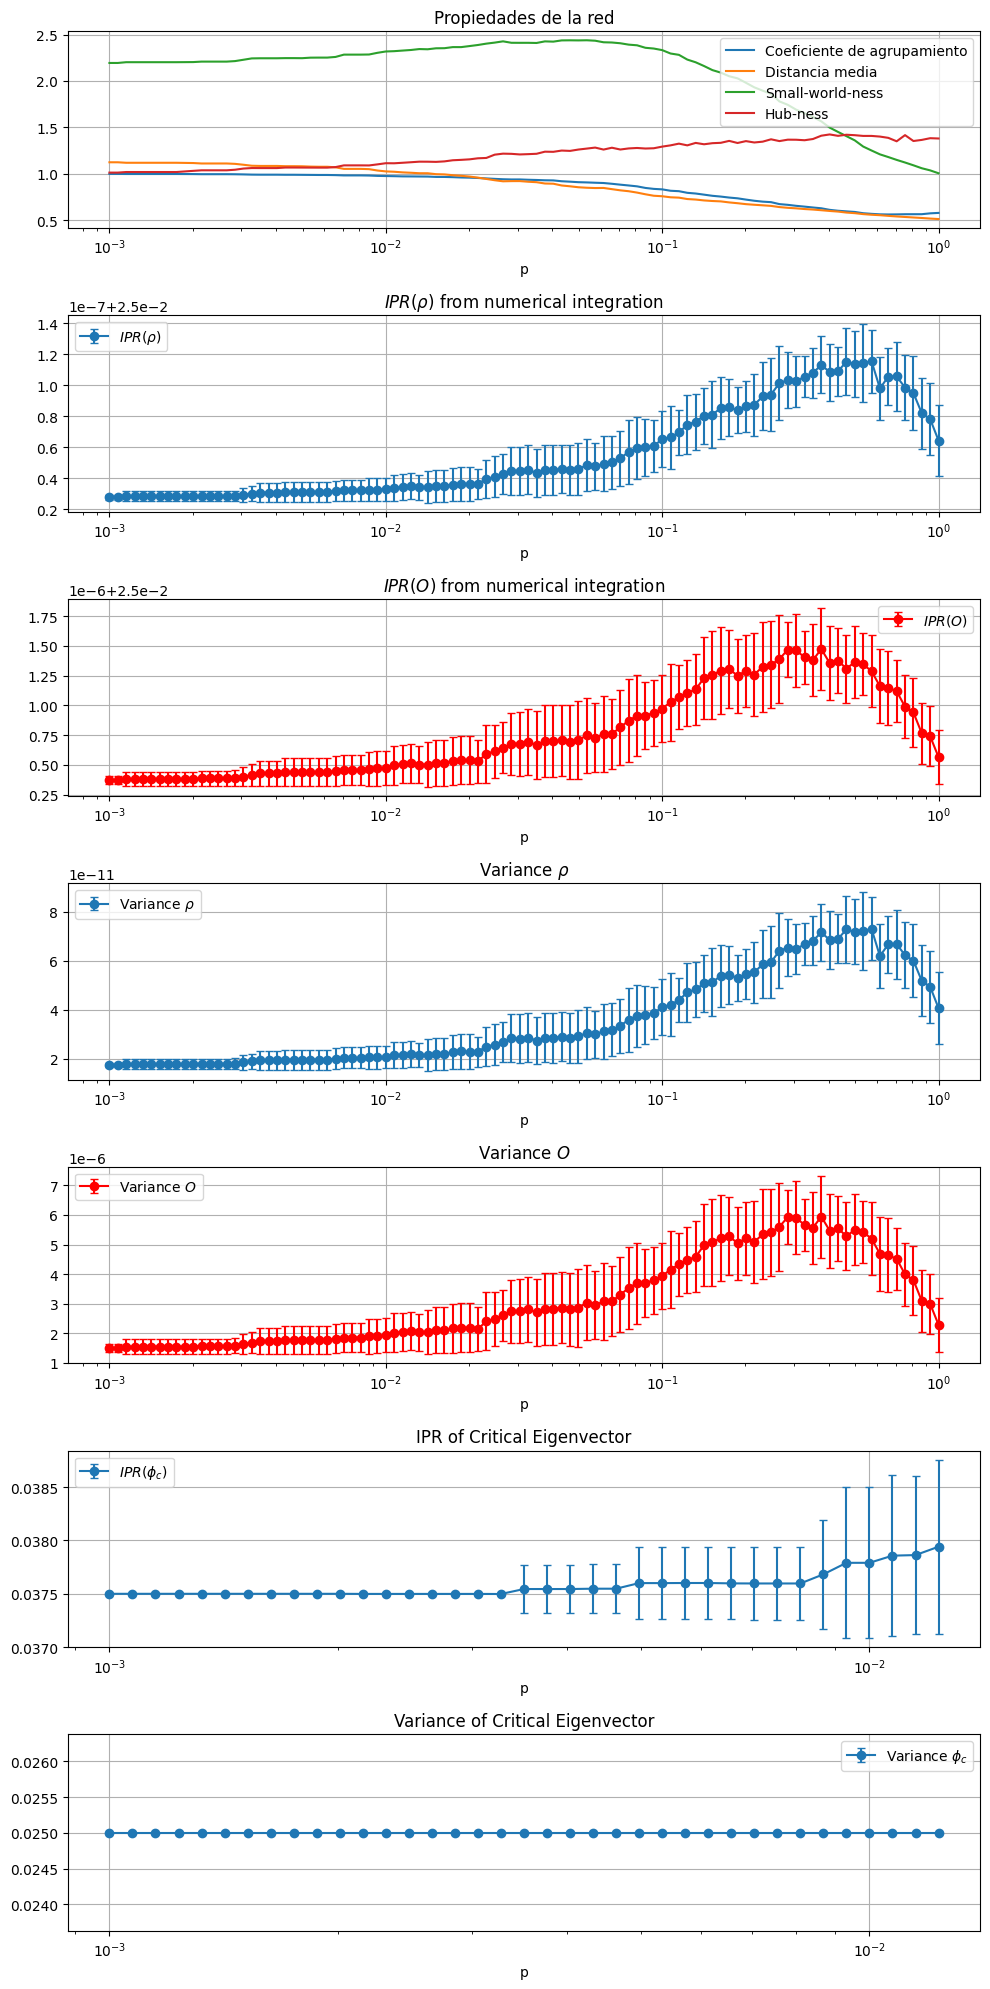

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [10]:
experiment = experiments(40, 6, 100, 25, params)
print(experiment)

## Pandas framework 

In [10]:
import pandas as pd
from multiprocessing import Pool

def process_graph(args):
    """Helper function to process a single graph with given parameters"""
    p, seed, n_nodes, n_neighbors, params = args
    graph = nx.newman_watts_strogatz_graph(n=n_nodes, k=n_neighbors, p=p, seed=seed)
    max_clustering = 3/4 * (n_neighbors - 2) / (n_neighbors - 1)
    max_length = n_nodes / (2 * n_neighbors)
    
    transitivity = nx.transitivity(graph) / max_clustering
    avg_length = nx.average_shortest_path_length(graph) / max_length
    
    dynamics = get_dynamics(graph, params)

    avg_degree = dynamics["k_avg"]
    transitivity_random = (avg_degree / n_nodes) / max_clustering
    avg_length_random = (np.log(n_nodes) / np.log(avg_degree)) / max_length
    sigma = (transitivity / transitivity_random) / (avg_length / avg_length_random)

    max_degree = max(dict(graph.degree()).values())
    hub_ness = max_degree / avg_degree

    avg_clustering = dynamics["avg_clustering"]
    weighted_k_avg = dynamics["weighted_k_avg"]
    weighted_clustering = dynamics["weighted_clustering"]
    
    return {
        'p': p,
        'seed': seed,
        'n_nodes': n_nodes,
        'n_neighbors': n_neighbors,
        'transitivity': transitivity,
        'avg_length': avg_length,
        'sigma': sigma,
        'hub_ness': hub_ness,
        'ipr_rho': dynamics['ipr_rho'],
        'ipr_O': dynamics['ipr_O'],
        'ipr_eigenvector': dynamics['ipr_eigenvector'],
        'variance_rho': dynamics['variance_rho'],
        'variance_O': dynamics['variance_O'],
        'variance_eigenvector': dynamics['variance_eigenvector'],
        'k_avg': dynamics['k_avg'],
        'avg_clustering': avg_clustering,
        'weighted_k_avg': weighted_k_avg,
        'weighted_clustering': weighted_clustering
    }

def experiments(n_nodes, n_neighbors, n_experiments, sample_size, params):
    print("Starting the experiments...")
    p_values = np.logspace(-3, 0, n_experiments)
    all_results = []

    with Pool() as pool:
        for i, p in enumerate(p_values):
            print(f"Computing graph {i + 1}/{n_experiments}...")
            args = [(p, seed, n_nodes, n_neighbors, params) for seed in range(sample_size)]
            results = pool.map(process_graph, args)
            all_results.extend(results)

    df = pd.DataFrame(all_results)
    df.set_index(['p', 'n_nodes', 'n_neighbors', 'seed'], inplace=True)
    return df


In [16]:
experiment_df = experiments(40, 6, 50, 8, params)
experiment_df.head()

Starting the experiments...
Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...





Starting the integration...Starting the integration...

Computing graph 1/50...
Integration finished.Integration finished.

Linear algebra computations...Integration finished.Linear algebra computations...


Integration finished.Linear algebra computations...
Integration finished.Linear algebra computations...

Integration finished.

Integration finished.Linear algebra computations...Linear algebra computations...Integration finished.



Linear algebra computations...Linear algebra computations...

Computations finished.Computations finished.Computations finished.Computations finished.


Computations finished.Computations finished.
Computations finished.Computations finished.



Starting the integration...Starting the integration...

Starting the integration...Starting the integration...

Star

transitivity  avg_length     sigma  hub_ness  \
p     n_nodes n_neighbors seed                                                 
0.001 40      6           0              1.0    1.130769  2.184852       1.0   
                          1              1.0    1.130769  2.184852       1.0   
                          2              1.0    1.130769  2.184852       1.0   
                          3              1.0    1.130769  2.184852       1.0   
                          4              1.0    1.130769  2.184852       1.0   

                                ipr_rho  ipr_O  ipr_eigenvector  variance_rho  \
p     n_nodes n_neighbors seed                                                  
0.001 40      6           0       0.025  0.025           0.0375  1.742767e-11   
                          1       0.025  0.025           0.0375  1.742767e-11   
                          2       0.025  0.025           0.0375  1.742767e-11   
                          3       0.025  0.025           0.0375  1.742767e-11   
                          4       0.025  0.025           0.0375  1.742767e-11   

                                variance_O  variance_eigenvector  k_avg  \
p     n_nodes n_neighbors seed                                            
0.001 40      6           0       0.000001                 0.025    6.0   
                          1       0.000001                 0.025    6.0   
                          2       0.000001                 0.025    6.0   
                          3       0.000001                 0.025    6.0   
                          4       0.000001                 0.025    6.0   

                                avg_clustering  \
p     n_nodes n_neighbors seed                   
0.001 40      6           0                0.6   
                          1                0.6   
                          2                0.6   
                          3                0.6   
                          4                0.6   

                                                                   weighted_k_avg  \
p     n_nodes n_neighbors seed                                                      
0.001 40      6           0     [6.0, 6.0, 6.0, 6.000000000000001, 6.000000000...   
                          1     [6.0, 6.0, 6.0, 6.000000000000001, 6.000000000...   
                          2     [6.0, 6.0, 6.0, 6.000000000000001, 6.000000000...   
                          3     [6.0, 6.0, 6.0, 6.000000000000001, 6.000000000...   
                          4     [6.0, 6.0, 6.0, 6.000000000000001, 6.000000000...   

                                                              weighted_clustering  
p     n_nodes n_neighbors seed                                                     
0.001 40      6           0     [0.6, 0.6, 0.6, 0.6000000000000001, 0.60000000...  
                          1     [0.6, 0.6, 0.6, 0.6000000000000001, 0.60000000...  
                          2     [0.6, 0.6, 0.6, 0.6000000000000001, 0.60000000...  
                          3     [0.6, 0.6, 0.6, 0.6000000000000001, 0.60000000...  
                          4     [0.6, 0.6, 0.6, 0.6000000000000001, 0.60000000...

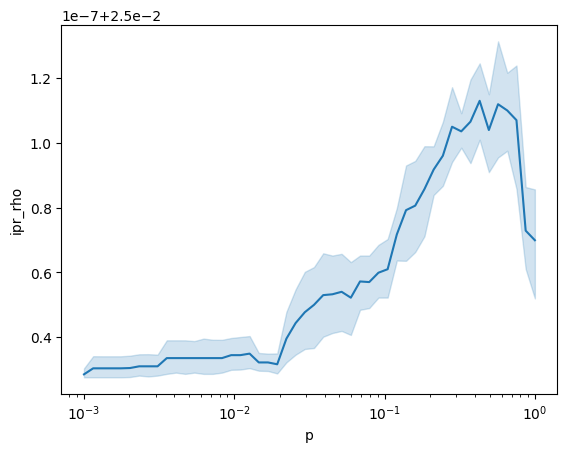

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a line plot for p vs ipr_rho
sns.lineplot(data=experiment_df.reset_index(), x='p', y='ipr_rho')
plt.xscale('log')
plt.show()

## Centrality measures and hotspot patterns

In [ ]:
from multiprocessing import Pool

def spectral_experiments_fixed_p_mean(
    n_nodes, n_neighbors, n_realizations, params, p,
    plot=True
):
    """
    Run several realizations for a fixed p and produce two clean plots:

      1) <k_c>/ <k>  vs  lambda / <k>
      2) <C_c> / <C> vs  lambda / <k>
    """

    print(f"Running spectral mean experiment with fixed p={p}...")

    # Parallel sampling of graphs for this fixed p
    with Pool() as pool:
        args = [(p, seed, n_nodes, n_neighbors, params)
                for seed in range(n_realizations)]
        results = pool.map(process_graph, args)

    # Assume all graphs have same number of eigenvalues
    dyn0 = results[0]["dynamics"]
    n = len(dyn0["eigenvalues"])

    # Collect normalized values for each realization
    all_x  = []  # (R, n): lambda_i / <k>
    all_yk = []  # <k_c,i> / <k>
    all_yc = []  # <C_c,i> / <C>

    for r in results:
        dyn = r["dynamics"]
        eigenvalues    = np.array(dyn["eigenvalues"])
        weighted_k     = np.array(dyn["weighted_k_avg"])
        weighted_c     = np.array(dyn["weighted_clustering"])
        k_avg          = dyn["k_avg"]
        avg_clustering = dyn["avg_clustering"]

        x_vals = eigenvalues / k_avg
        yk     = weighted_k / k_avg
        yc     = weighted_c / avg_clustering

        all_x.append(x_vals)
        all_yk.append(yk)
        all_yc.append(yc)

    all_x  = np.vstack(all_x)
    all_yk = np.vstack(all_yk)
    all_yc = np.vstack(all_yc)

    # Mean position and mean/std values per eigenmode
    x_mean  = all_x.mean(axis=0)
    yk_mean = all_yk.mean(axis=0)
    yk_std  = all_yk.std(axis=0)
    yc_mean = all_yc.mean(axis=0)
    yc_std  = all_yc.std(axis=0)

    result = {
        "x_mean": x_mean,
        "yk_mean": yk_mean,
        "yk_std": yk_std,
        "yc_mean": yc_mean,
        "yc_std": yc_std,
        "p": p
    }

    if not plot:
        return result

    print("Plotting mean ± std spectral statistics...")

    fig, axes = plt.subplots(2, 1, figsize=(10, 8))

    # --- Plot 1: <k_c>/<k> ---
    axes[0].errorbar(
        x_mean, yk_mean, yerr=yk_std,
        fmt='o', markersize=3, linewidth=1, capsize=2
    )
    axes[0].axhline(1.0, color='gray', linestyle='--', linewidth=1)

    # vertical line at lambda/<k> = -1
    axes[0].axvline(-1.0, color='gray', linestyle='--', linewidth=1)

    axes[0].set_xlabel(r'$\lambda_i / \langle k \rangle$')
    axes[0].set_ylabel(r'$\langle k_{c,i} \rangle / \langle k \rangle$')
    axes[0].set_title(r'Weighted degree vs eigenvalues (fixed $p$)')

    # --- Plot 2: <C_c>/<C> ---
    axes[1].errorbar(
        x_mean, yc_mean, yerr=yc_std,
        fmt='o', markersize=3, linewidth=1, capsize=2
    )
    axes[1].axhline(1.0, color='gray', linestyle='--', linewidth=1)
    axes[1].axvline(-1.0, color='gray', linestyle='--', linewidth=1)

    axes[1].set_xlabel(r'$\lambda_i / \langle k \rangle$')
    axes[1].set_ylabel(r'$\langle C_{c,i} \rangle / \langle C \rangle$')
    axes[1].set_title(r'Weighted clustering vs eigenvalues (fixed $p$)')

    plt.tight_layout()
    plt.show()

    return result


Running spectral mean experiment with fixed p=0.3...


Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...
Starting the integration...Starting the integration...Starting the integration...Starting the integration...
Starting the integration...









Starting the integration...
Starting the integration...
Starting the integration...Starting the integration...

Integration finished.
Linear algebra computations...
Integration finished.
Integration finished.Linear algebra computations...

Linear algebra computations...
Integration finished.Integration finished.Integration finished.


Linear algebra computations...Computations finished.Linear algebra computations...Linear algebra computations...



Starting the integration...
Computations finished.
Integration finished.Computations finished.

Linear algebra computations...
Starting the integration...Computations finished.
Starting the integration...

Compu

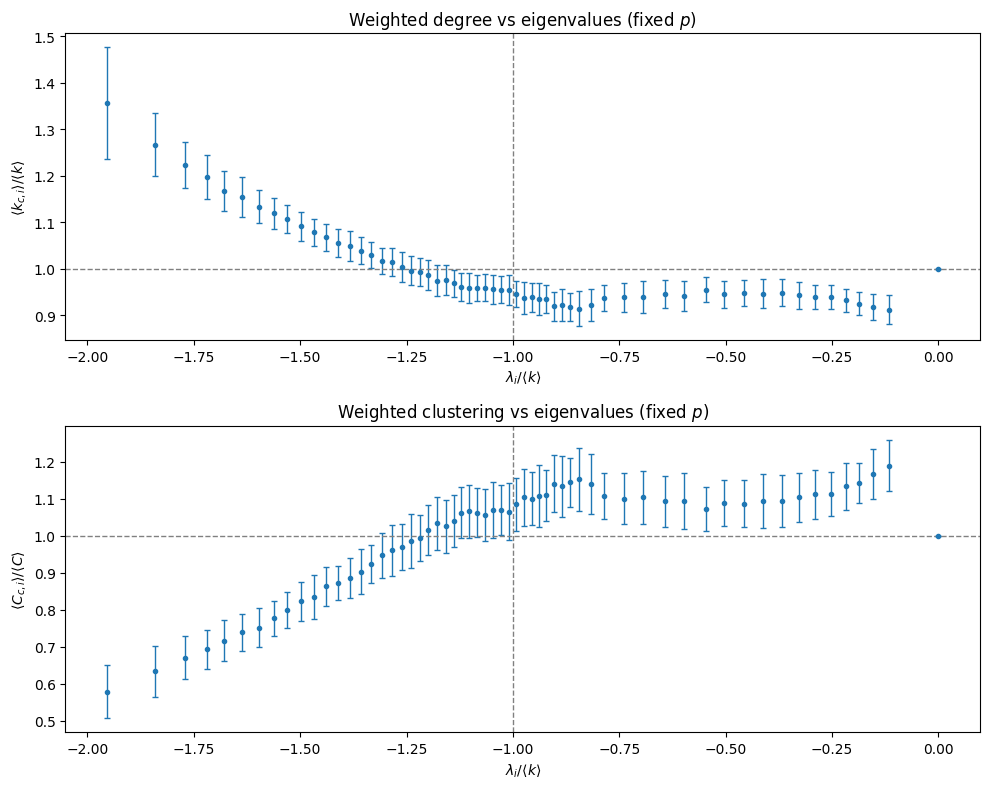

{'x_mean': array([-1.95407768e+00, -1.84024414e+00, -1.76997113e+00, -1.71944709e+00,
        -1.67835666e+00, -1.63672993e+00, -1.59738792e+00, -1.56147395e+00,
        -1.53186416e+00, -1.49801296e+00, -1.46840586e+00, -1.43825032e+00,
        -1.41122232e+00, -1.38277429e+00, -1.35736009e+00, -1.33358743e+00,
        -1.30784272e+00, -1.28319533e+00, -1.26067421e+00, -1.24018512e+00,
        -1.21913034e+00, -1.19866240e+00, -1.17808824e+00, -1.15813841e+00,
        -1.13947027e+00, -1.12201437e+00, -1.10303710e+00, -1.08439880e+00,
        -1.06506128e+00, -1.04705619e+00, -1.02763135e+00, -1.00996624e+00,
        -9.92305854e-01, -9.72963696e-01, -9.55002663e-01, -9.38209726e-01,
        -9.21416688e-01, -9.03056566e-01, -8.83636561e-01, -8.65069508e-01,
        -8.44749865e-01, -8.15602894e-01, -7.85107260e-01, -7.38275082e-01,
        -6.93508187e-01, -6.43440071e-01, -5.97579810e-01, -5.45594055e-01,
        -5.04174583e-01, -4.56710857e-01, -4.11721376e-01, -3.66567302e-01,
  

In [ ]:
spectral_experiments_fixed_p_mean(60, 4, 100, params, p=0.30, plot=True)

In [ ]:
def spectral_experiments_multi_p_mean(
    n_nodes,
    n_neighbors,
    n_realizations,
    params,
    p_list,        # e.g. [0.0, 0.01, 0.30, 0.90]
    plot=True
):
    """
    Run spectral_experiments_fixed_p_mean for several p's and plot
    them together on the same figure.

    Returns a dict: results[p] = stats_for_that_p
    where each stats dict has keys:
        x_mean, yk_mean, yk_std, yc_mean, yc_std, p
    """

    results = {}

    # First run all experiments (no plotting yet)
    for p in p_list:
        stats = spectral_experiments_fixed_p_mean(
            n_nodes=n_nodes,
            n_neighbors=n_neighbors,
            n_realizations=n_realizations,
            params=params,
            p=p,
            plot=False
        )
        results[p] = stats

    if not plot:
        return results

    # ---- Combined plot ----
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))

    # Colors/markers will cycle automatically; we just add labels
    for p in p_list:
        stats = results[p]
        x_mean  = stats["x_mean"]
        yk_mean = stats["yk_mean"]
        yk_std  = stats["yk_std"]
        yc_mean = stats["yc_mean"]
        yc_std  = stats["yc_std"]

        # 1) <k_c>/<k> vs lambda/<k>
        axes[0].errorbar(
            x_mean, yk_mean, yerr=yk_std,
            fmt='o', markersize=3, linewidth=1, capsize=2,
            label=f"p = {p}"
        )

        # 2) <C_c>/<C> vs lambda/<k>
        axes[1].errorbar(
            x_mean, yc_mean, yerr=yc_std,
            fmt='o', markersize=3, linewidth=1, capsize=2,
            label=f"p = {p}"
        )

    # Horizontal reference lines at 1
    axes[0].axhline(1.0, color='gray', linestyle='--', linewidth=1)
    axes[1].axhline(1.0, color='gray', linestyle='--', linewidth=1)

    # Vertical reference at lambda/<k> = -1
    axes[0].axvline(-1.0, color='gray', linestyle='--', linewidth=1)
    axes[1].axvline(-1.0, color='gray', linestyle='--', linewidth=1)

    axes[0].set_xlabel(r'$\lambda_i / \langle k \rangle$')
    axes[0].set_ylabel(r'$\langle k_{c,i} \rangle / \langle k \rangle$')
    axes[0].set_title(r'Weighted degree vs eigenvalues (multiple $p$)')
    axes[0].legend()

    axes[1].set_xlabel(r'$\lambda_i / \langle k \rangle$')
    axes[1].set_ylabel(r'$\langle C_{c,i} \rangle / \langle C \rangle$')
    axes[1].set_title(r'Weighted clustering vs eigenvalues (multiple $p$)')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    return results


Running spectral mean experiment with fixed p=0.0...
Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...
Starting the integration...
Starting the integration...
Starting the integration...
Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...

Starting the integration...











Integration finished.Integration finished.

Linear algebra computations...Linear algebra computations...

Integration finished.Integration finished.

Integration finished.Integration finished.Linear algebra computations...Linear algebra computations...



Linear algebra computations...Linear algebra computations...

Integration finished.
Linear algebra computations...Computations finished.
Computations finished.

Starting the integration...
Starting the integration...
Computations finished.
Computations finished.Integration finished.Computations finished.

Computations finished.

Linear algebra computations...Starting the integration...
Starting the integration...
Starting the integration...Integration finished.
Starting the integration...Integration finished.



Linear algebra computations...Computations finished.Linear algebra computations...Integration finished.Integration finished.Integration finished.




Linear algebra computations...Linear algebra computations...


Starting the 

/tmp/ipykernel_16014/2672861779.py:226: ComplexWarning: Casting complex values to real discards the imaginary part
  'critical_eigenvalue': float(eigenvalues[index_lambda_c]),


Linear algebra computations...


/tmp/ipykernel_16014/2672861779.py:236: ComplexWarning: Casting complex values to real discards the imaginary part
  'ipr_eigenvector': float(ipr_eigenvector),



Starting the integration...
Computations finished.Computations finished.

Integration finished.Starting the integration...

Linear algebra computations...Integration finished.Integration finished.

Starting the integration...Integration finished.Linear algebra computations...



Linear algebra computations...Linear algebra computations...Computations finished.


Integration finished.
Linear algebra computations...Starting the integration...

Integration finished.
Integration finished.
Linear algebra computations...
Computations finished.Linear algebra computations...Computations finished.


Computations finished.Starting the integration...

Computations finished.Starting the integration...

Integration finished.
Computations finished.Linear algebra computations...
Starting the integration...

Starting the integration...
Starting the integration...
Computations finished.
Computations finished.
Starting the integration...
Starting the integration...Integration finished.

Computations fi

/tmp/ipykernel_16014/2672861779.py:226: ComplexWarning: Casting complex values to real discards the imaginary part
  'critical_eigenvalue': float(eigenvalues[index_lambda_c]),


Computations finished.Integration finished.

/tmp/ipykernel_16014/2672861779.py:236: ComplexWarning: Casting complex values to real discards the imaginary part
  'ipr_eigenvector': float(ipr_eigenvector),




Linear algebra computations...Computations finished.

Computations finished.
Computations finished.
Computations finished.
Integration finished.
Linear algebra computations...
Computations finished.


/tmp/ipykernel_16014/2672861779.py:226: ComplexWarning: Casting complex values to real discards the imaginary part
  'critical_eigenvalue': float(eigenvalues[index_lambda_c]),
/tmp/ipykernel_16014/2672861779.py:236: ComplexWarning: Casting complex values to real discards the imaginary part
  'ipr_eigenvector': float(ipr_eigenvector),


Integration finished.
Linear algebra computations...
Integration finished.
Linear algebra computations...
Computations finished.
Computations finished.
Running spectral mean experiment with fixed p=0.1...
Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...Starting the integration...

Starting the integration...
Starting the integration...Starting the integration...

Starting the integration...
Starting the integration...Starting the integration...
Starting the integration...








Integration finished.
Integration finished.
Linear algebra computations...Integration finished.
Linear algebra computations...

Linear algebra computations...
Computations finished.
Computations finished.
Integration finished.Integration finished.
Linear algebra computations...Starting the integration...


Integration finished.Starting the integ

/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


Integration finished.Integration finished.
Linear algebra computations...

Linear algebra computations...Computations finished.Integration finished.
Integration finished.


Linear algebra computations...The critical eigenvalue is not in the range of the dispersion relation.Linear algebra computations...
The linear analysis cannot be performed.

The critical eigenvalue is not in the range of the dispersion relation.
Integration finished.The critical eigenvalue is: 
Integration finished.Computations finished.Integration finished.


 Linear algebra computations...
The linear analysis cannot be performed.-2.1016182221230713Starting the integration...
Linear algebra computations...The critical eigenvalue is not in the range of the dispersion relation.Linear algebra computations...


The critical eigenvalue is not in the range of the dispersion relation.


The critical eigenvalue is: 

/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)



The linear analysis cannot be performed.The linear analysis cannot be performed.The critical eigenvalue is not in the range of the dispersion relation.


The critical eigenvalue is not in the range of the dispersion relation.The linear analysis cannot be performed. The critical eigenvalue is not in the range of the dispersion relation.The critical eigenvalue is: The critical eigenvalue is: 

 
Integration finished. -2.1006664782945172The linear analysis cannot be performed.-2.2019550206169574Starting the integration...The critical eigenvalue is: 
The linear analysis cannot be performed.


-2.359940232889411 
Linear algebra computations...
The critical eigenvalue is: 

/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)



-2.297730160724522 The critical eigenvalue is: 

/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


-1.9903401473114852



/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


Integration finished.Integration finished.
 
-2.192453547509505

/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


Linear algebra computations...Linear algebra computations...

The critical eigenvalue is not in the range of the dispersion relation.



/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


The linear analysis cannot be performed.
The critical eigenvalue is not in the range of the dispersion relation.The critical eigenvalue is not in the range of the dispersion relation.The critical eigenvalue is:  

The linear analysis cannot be performed.
The linear analysis cannot be performed.The critical eigenvalue is:  -2.1283017921530947
-2.2734274870681173



/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


The critical eigenvalue is: 

/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


Computations finished. 
-2.0982210702688606Computations finished.Integration finished.
Computations finished.


/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)




Linear algebra computations...
Computations finished.
Computations finished.
Computations finished.Starting the integration...
The critical eigenvalue is not in the range of the dispersion relation.
Starting the integration...

The linear analysis cannot be performed.Starting the integration...Starting the integration...

Computations finished.Starting the integration...The critical eigenvalue is: 

 
-2.195676918401957
Starting the integration...

/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


Computations finished.
Starting the integration...Computations finished.


Starting the integration...Computations finished.Starting the integration...


Integration finished.Starting the integration...Integration finished.
Linear algebra computations...


Linear algebra computations...
Computations finished.
The critical eigenvalue is not in the range of the dispersion relation.
The critical eigenvalue is not in the range of the dispersion relation.The linear analysis cannot be performed.
The linear analysis cannot be performed.Starting the integration...

The critical eigenvalue is: 
The critical eigenvalue is:   -5.329070518200751e-15
-5.785142944304497e-16

/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


Computations finished.
Computations finished.
Starting the integration...
Integration finished.
Linear algebra computations...
Starting the integration...
The critical eigenvalue is not in the range of the dispersion relation.
The linear analysis cannot be performed.
The critical eigenvalue is:  -2.310718102027346


/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


Computations finished.
Starting the integration...
Integration finished.
Linear algebra computations...
The critical eigenvalue is not in the range of the dispersion relation.
The linear analysis cannot be performed.
Integration finished.The critical eigenvalue is: 
 -1.972828450756772Linear algebra computations...

The critical eigenvalue is not in the range of the dispersion relation.
The linear analysis cannot be performed.
The critical eigenvalue is:  -2.2896759534391613
Computations finished.
Starting the integration...
Integration finished.Integration finished.
Computations finished.
Linear algebra computations...Linear algebra computations...


Starting the integration...The critical eigenvalue is not in the range of the dispersion relation.The critical eigenvalue is not in the range of the dispersion relation.
Integration finished.

The linear analysis cannot be performed.
The linear analysis cannot be performed.
Integration finished.

Linear algebra computations...The critical

/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


Linear algebra computations...
Integration finished.The critical eigenvalue is not in the range of the dispersion relation.
Integration finished.

Linear algebra computations...The linear analysis cannot be performed.Linear algebra computations...


The critical eigenvalue is: The critical eigenvalue is not in the range of the dispersion relation.
The critical eigenvalue is not in the range of the dispersion relation. Integration finished.The linear analysis cannot be performed.
Computations finished.
3.90562503341968e-15
The linear analysis cannot be performed.
Linear algebra computations...Computations finished.The critical eigenvalue is: 

 
1.993265394186264e-15Integration finished.


/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


The critical eigenvalue is: 

 

/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


The critical eigenvalue is not in the range of the dispersion relation.Linear algebra computations...0.0
Integration finished.


/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)



Integration finished.

Linear algebra computations...Linear algebra computations...The linear analysis cannot be performed.The critical eigenvalue is not in the range of the dispersion relation.Starting the integration...Integration finished.Starting the integration...



The critical eigenvalue is: 


 Linear algebra computations...The linear analysis cannot be performed.-2.2120545415043074
The critical eigenvalue is not in the range of the dispersion relation.
The critical eigenvalue is not in the range of the dispersion relation.The critical eigenvalue is: Integration finished.
 
-2.1974368731579874

The linear analysis cannot be performed.


/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


Linear algebra computations...The linear analysis cannot be performed.
The critical eigenvalue is not in the range of the dispersion relation.


/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)




Integration finished.The critical eigenvalue is: 
Computations finished.The critical eigenvalue is: Integration finished.The linear analysis cannot be performed. 
Linear algebra computations...
 The critical eigenvalue is not in the range of the dispersion relation.


-2.21490501685615645.329070518200751e-15The critical eigenvalue is: Linear algebra computations...The linear analysis cannot be performed.

 Computations finished.Computations finished.

/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


5.329070518200751e-15


Starting the integration...The critical eigenvalue is: 


/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


The critical eigenvalue is not in the range of the dispersion relation.



/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


 
The critical eigenvalue is not in the range of the dispersion relation.-2.2191390060796734The linear analysis cannot be performed.

Starting the integration...

/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)




The linear analysis cannot be performed.The critical eigenvalue is: Starting the integration...
 
The critical eigenvalue is: 
-2.234373734589468 Computations finished.Computations finished.-1.7763568394002505e-15




/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


Integration finished.


/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


Starting the integration...
Linear algebra computations...
Computations finished.
Computations finished.
The critical eigenvalue is not in the range of the dispersion relation.Computations finished.Computations finished.

Starting the integration...
Integration finished.
The linear analysis cannot be performed.
Linear algebra computations...

Starting the integration...Starting the integration...
Computations finished.Starting the integration...The critical eigenvalue is: 
The critical eigenvalue is not in the range of the dispersion relation.


Starting the integration...The linear analysis cannot be performed. 
-4.9633207639807675e-15
The critical eigenvalue is: 
Computations finished. 

/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


-2.353163913930239
Starting the integration...



/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


Starting the integration...
Computations finished.
Computations finished.
Integration finished.
Starting the integration...Linear algebra computations...Starting the integration...


The critical eigenvalue is not in the range of the dispersion relation.
The linear analysis cannot be performed.
The critical eigenvalue is:  -1.0962289997039762e-15


/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


Computations finished.
Starting the integration...
Integration finished.
Linear algebra computations...
The critical eigenvalue is not in the range of the dispersion relation.
The linear analysis cannot be performed.
Integration finished.The critical eigenvalue is: 
 Linear algebra computations...0.0
Integration finished.

Integration finished.
Linear algebra computations...
Linear algebra computations...The critical eigenvalue is not in the range of the dispersion relation.

The critical eigenvalue is not in the range of the dispersion relation.The linear analysis cannot be performed.
The critical eigenvalue is not in the range of the dispersion relation.
Integration finished.
The linear analysis cannot be performed.
The critical eigenvalue is: The linear analysis cannot be performed.Integration finished.
The critical eigenvalue is: The critical eigenvalue is: 
 
 0.0 Linear algebra computations...
-2.3042324415468043Linear algebra computations...
-2.3207629814635746

The critical eig

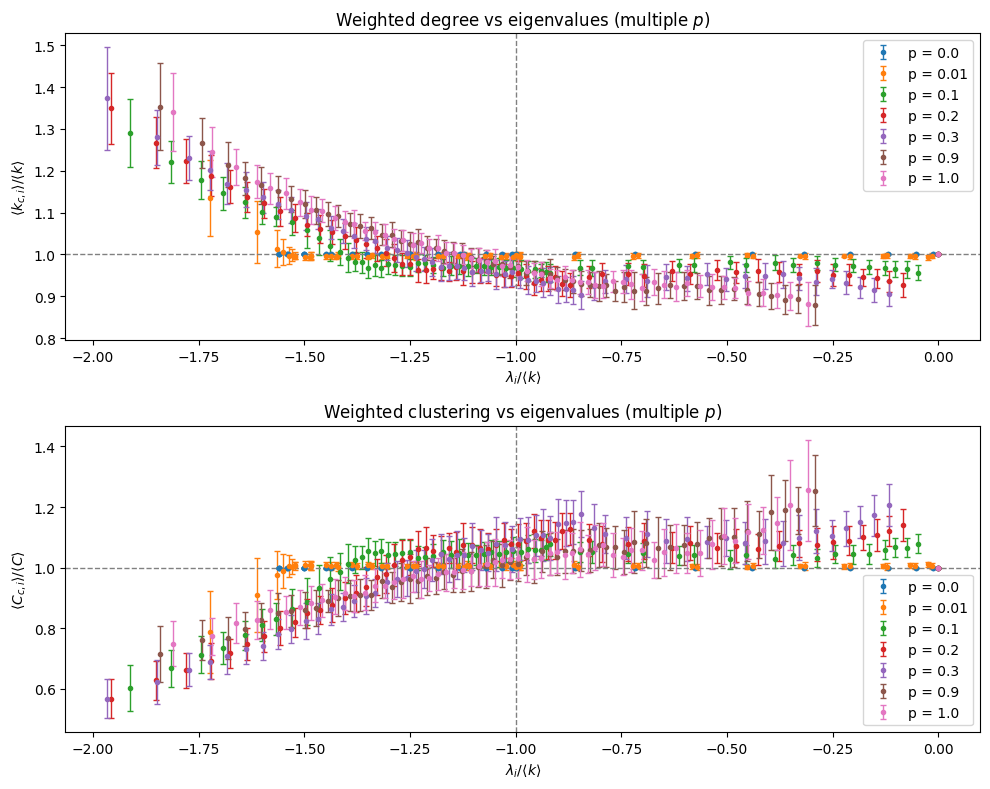

{0.0: {'x_mean': array([-1.56072857e+00, -1.56072857e+00, -1.55901699e+00, -1.55901699e+00,
         -1.54133803e+00, -1.54133803e+00, -1.53793362e+00, -1.53793362e+00,
         -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
         -1.44840112e+00, -1.44840112e+00, -1.43680957e+00, -1.43680957e+00,
         -1.38682953e+00, -1.38682953e+00, -1.35281688e+00, -1.35281688e+00,
         -1.31930818e+00, -1.31930818e+00, -1.25000000e+00, -1.25000000e+00,
         -1.25000000e+00, -1.25000000e+00, -1.18301270e+00, -1.18301270e+00,
         -1.13119698e+00, -1.13119698e+00, -1.12220743e+00, -1.12220743e+00,
         -1.07101976e+00, -1.07101976e+00, -1.03230107e+00, -1.03230107e+00,
         -1.00818715e+00, -1.00818715e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -8.60615871e-01, -8.60615871e-01, -7.17698928e-01,
         -7.17698928e-01, -5.76163356e-01, -5.76163356e-01, -4.40983006e-01,
         -4.40983006e-01, -3.16987298e-01, -3.16987298e-01, -

In [ ]:
spectral_experiments_multi_p_mean(
    n_nodes=60,
    n_neighbors=4,
    n_realizations=50,
    params=params,
    p_list=[0.0, 0.01, 0.1, 0.2, 0.30, 0.90, 1.0],
    plot=True
)

## Antes del cambio de fase

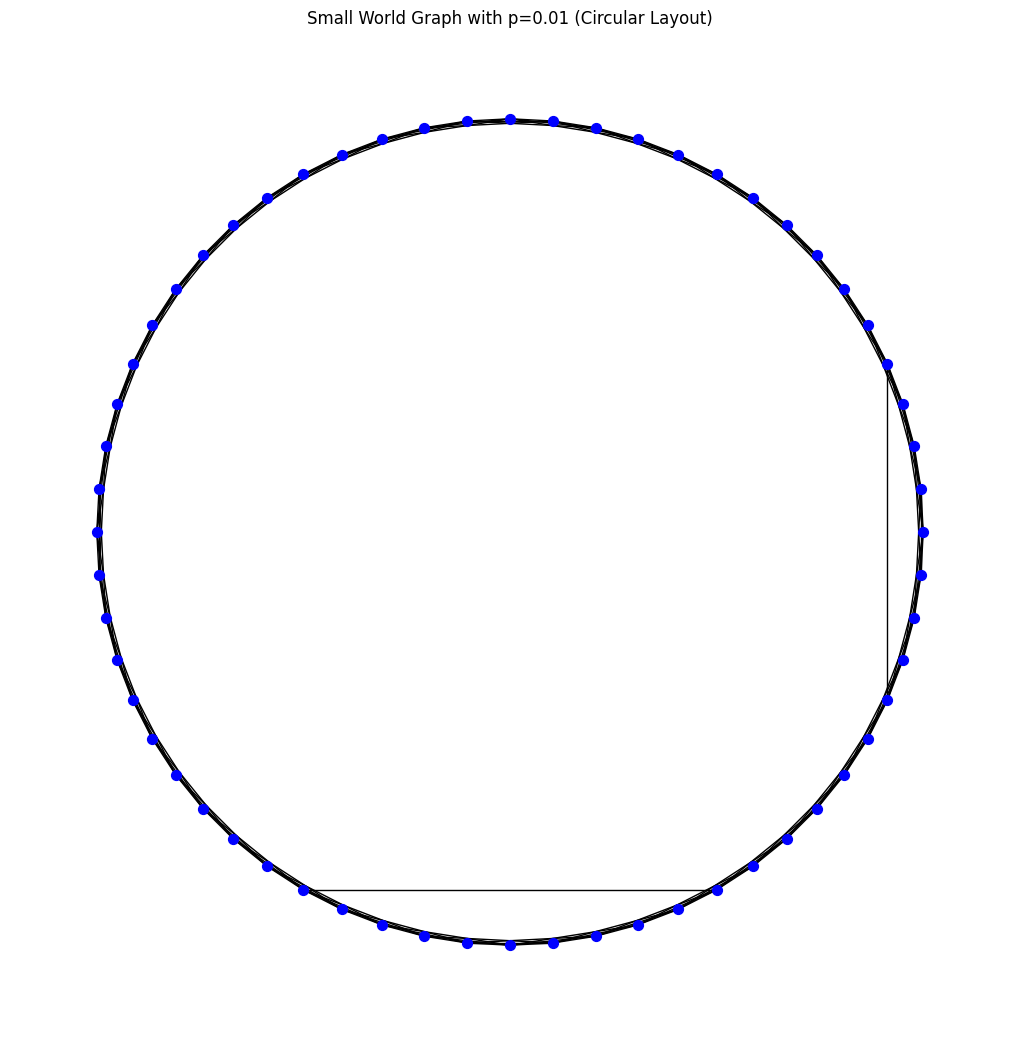

In [ ]:
# Generate a small world graph with p=0.3 
# graph = nx.newman_watts_strogatz_graph(n=60, k=8, p=0.39, seed=40)

graph = nx.newman_watts_strogatz_graph(n=60, k=6, p=0.45, seed=40)

# Draw the graph with a circular layout
plt.figure(figsize=(10, 10))
pos = nx.circular_layout(graph)
nx.draw(graph, pos, node_size=50, node_color='blue', with_labels=False)
plt.title("Small World Graph with p=0.01 (Circular Layout)")
plt.show()


In [ ]:
# # Create an empty graph
# G = nx.Graph()

# # Add nodes
# nodes = range(1, 17)
# G.add_nodes_from(nodes)

# # Add edges based on the visual structure
# edges = [
#     (1, 2), (1, 3), (1, 4), (2, 4), (2,5), (3, 4), (3, 6), (3, 7), (3, 8), (4, 5), (4, 8), (4, 9),
#     (5, 9), (6, 7), (7, 8), (7, 11), (7, 10), (7, 13), (8, 9), (8, 11), (8, 12), (9, 12),
#     (10, 13), (11, 12), (11, 13), (11, 14), (12, 14), (12, 15), (13, 14), (13, 16) ,(14, 15),
#     (14, 16), (15, 16)
# ]
# G.add_edges_from(edges)
# graph = G

Starting the integration...
Integration finished.
Linear algebra computations...


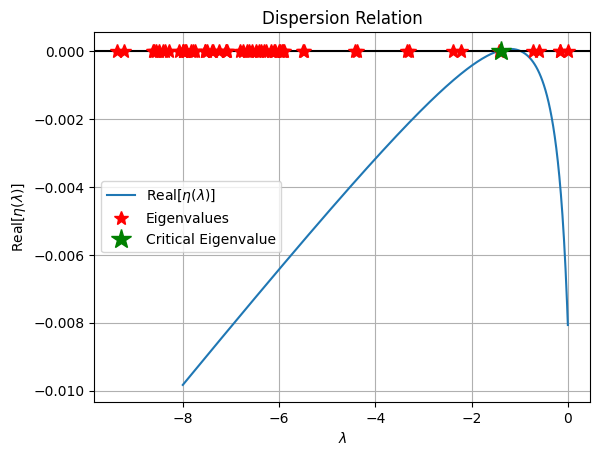

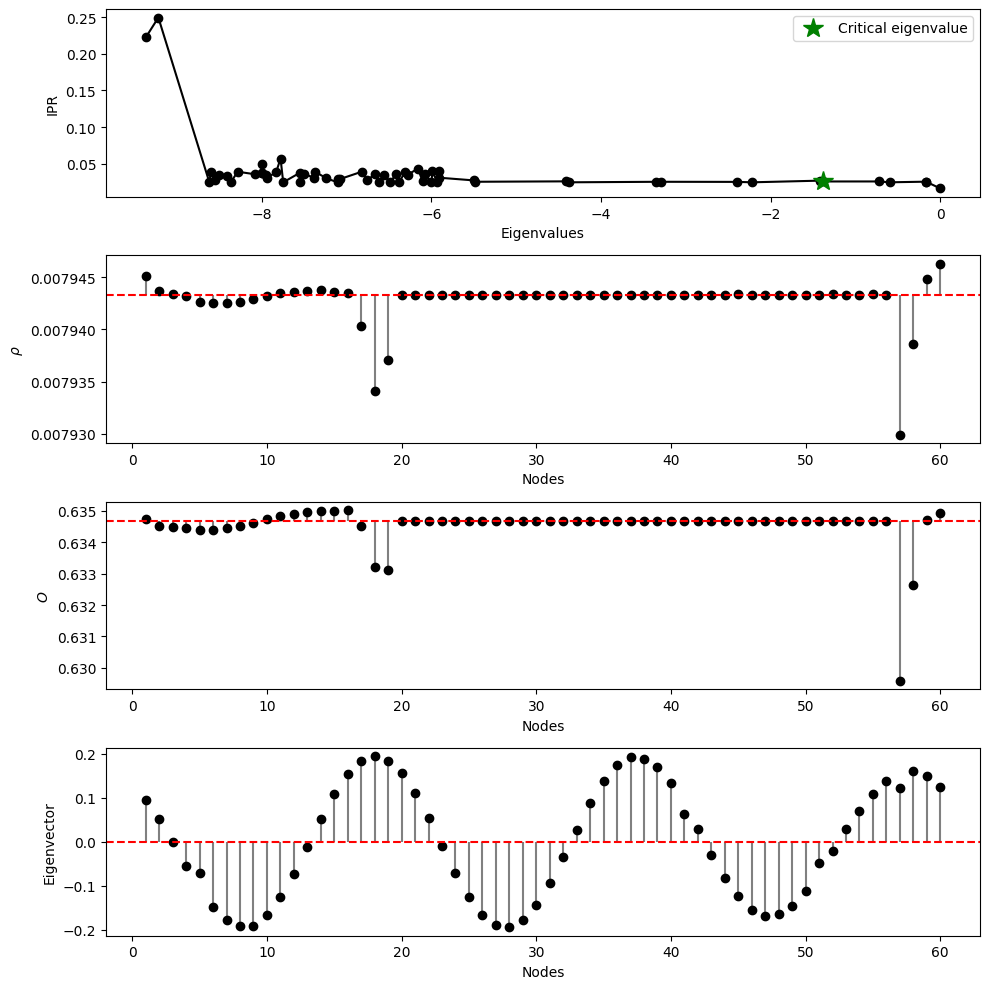

Computations finished.


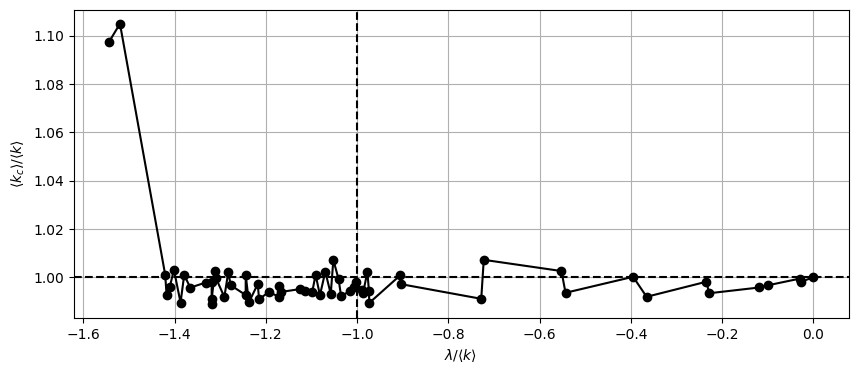

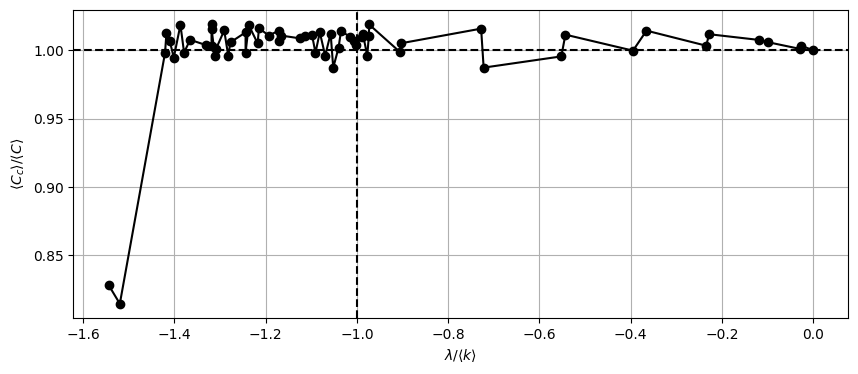

In [ ]:
dyn_1 = get_dynamics(graph, params, plot=True)

## Justo en el cambio de fase 

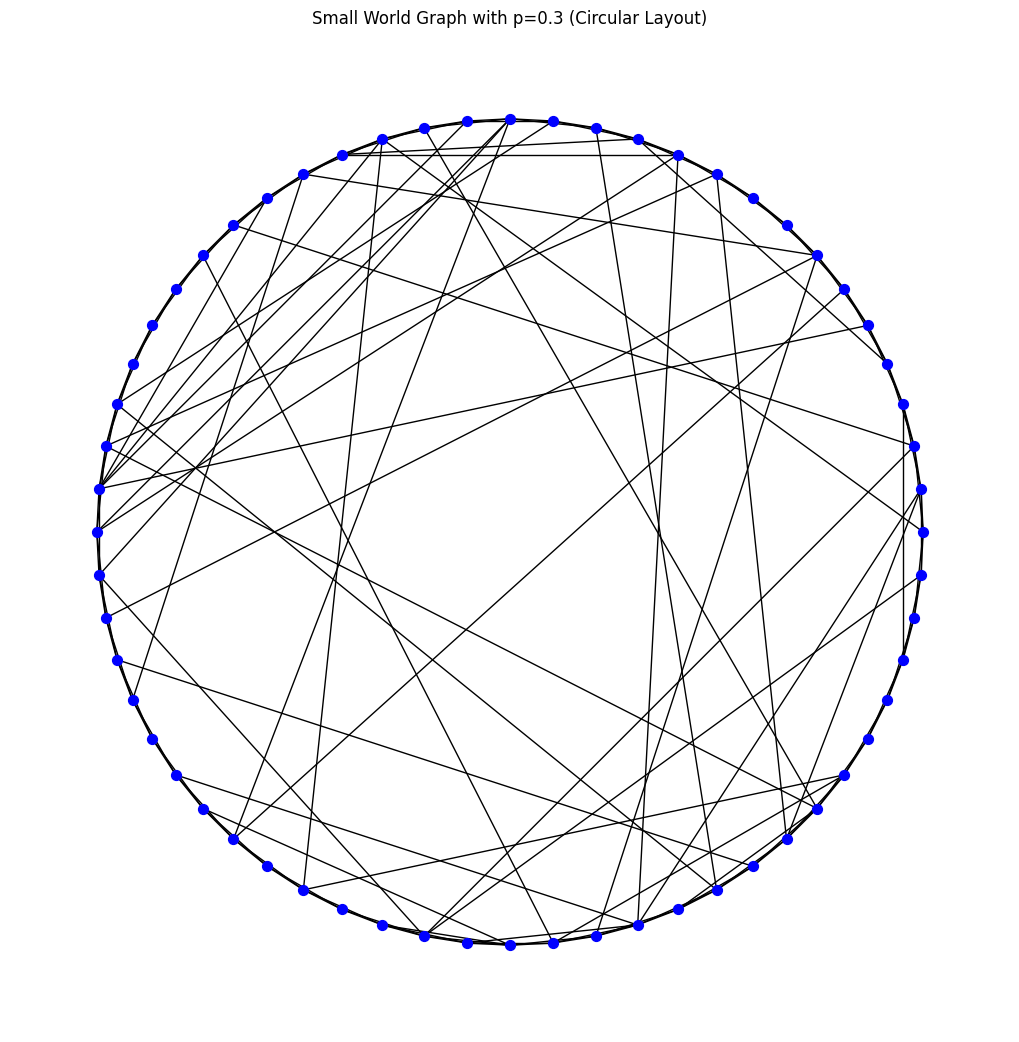

In [ ]:
# Generate a small world graph with p=0.3 
# graph = nx.newman_watts_strogatz_graph(n=60, k=8, p=0.39, seed=40)
graph = nx.newman_watts_strogatz_graph(n=60, k=4, p=0.30, seed=40)

# Draw the graph with a circular layout
plt.figure(figsize=(10, 10))
pos = nx.circular_layout(graph)
nx.draw(graph, pos, node_size=50, node_color='blue', with_labels=False)
plt.title("Small World Graph with p=0.3 (Circular Layout)")
plt.show()

Starting the integration...


Integration finished.
Linear algebra computations...


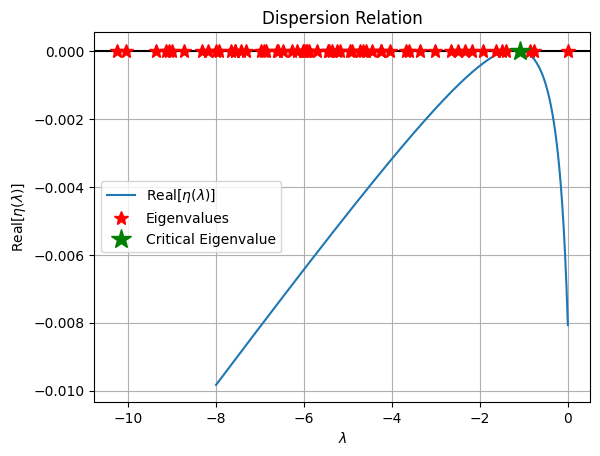

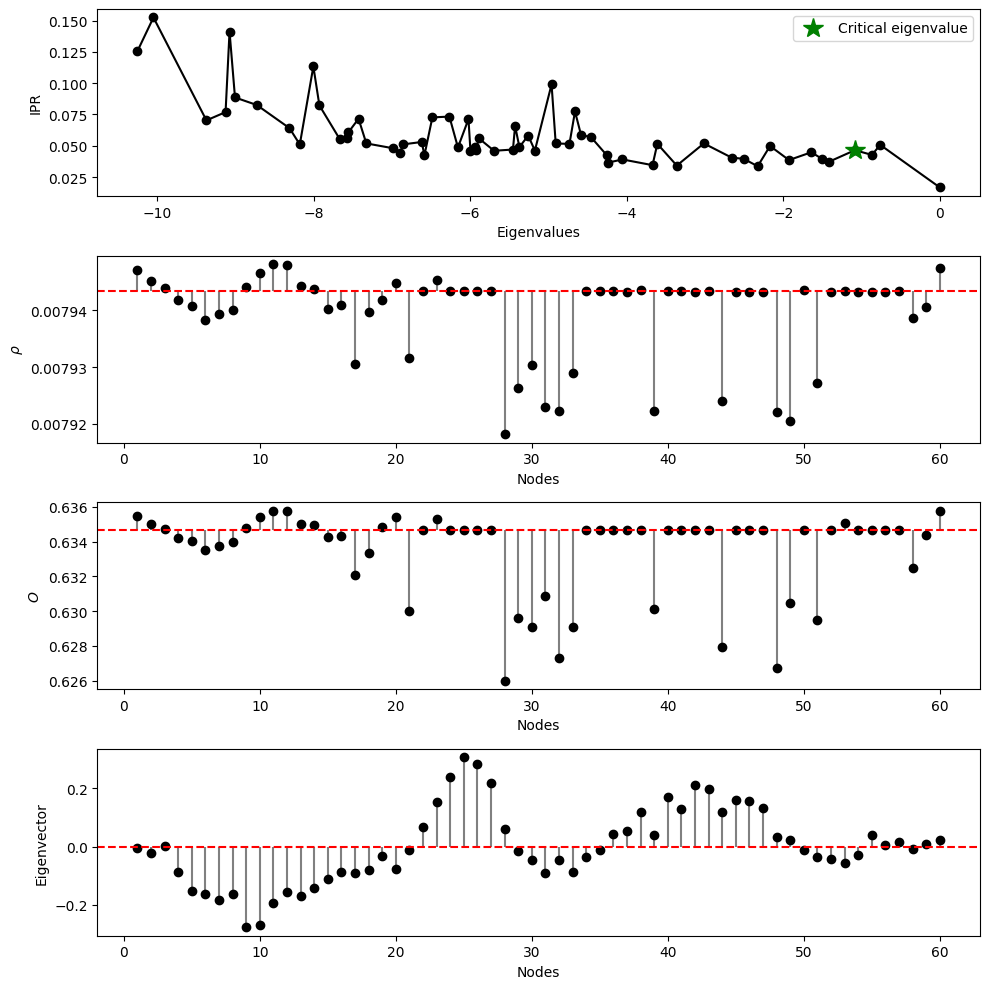

Computations finished.


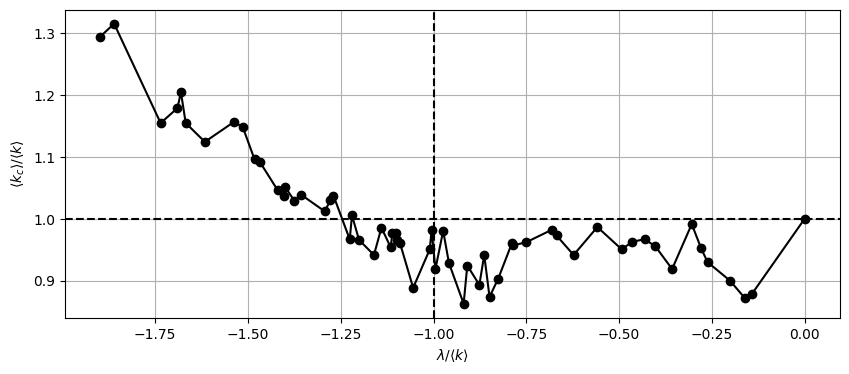

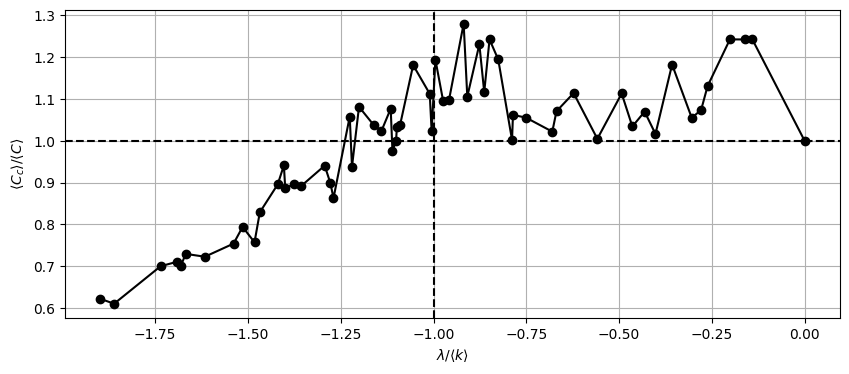

In [ ]:
dyn_1 = get_dynamics(graph, params, plot=True)

## Después del cambio de fase

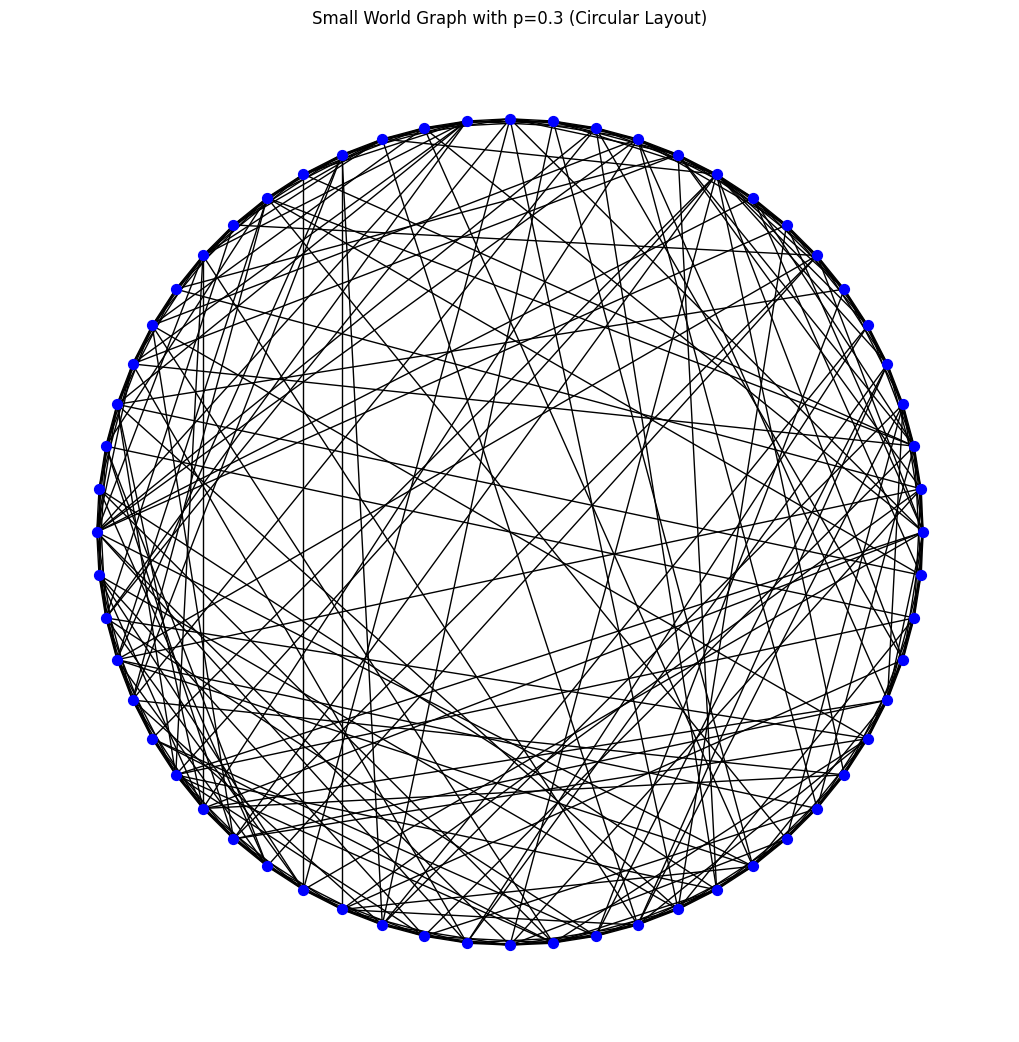

In [ ]:
# Generate a small world graph with p=0.3 
# graph = nx.newman_watts_strogatz_graph(n=60, k=8, p=0.39, seed=40)
graph = nx.newman_watts_strogatz_graph(n=60, k=6, p=0.8, seed=40)

# Draw the graph with a circular layout
plt.figure(figsize=(10, 10))
pos = nx.circular_layout(graph)
nx.draw(graph, pos, node_size=50, node_color='blue', with_labels=False)
plt.title("Small World Graph with p=0.3 (Circular Layout)")
plt.show()

Starting the integration...


Integration finished.
Linear algebra computations...
The critical eigenvalue is not in the range of the dispersion relation.
The linear analysis cannot be performed.
The critical eigenvalue is:  3.2423514257754724e-15


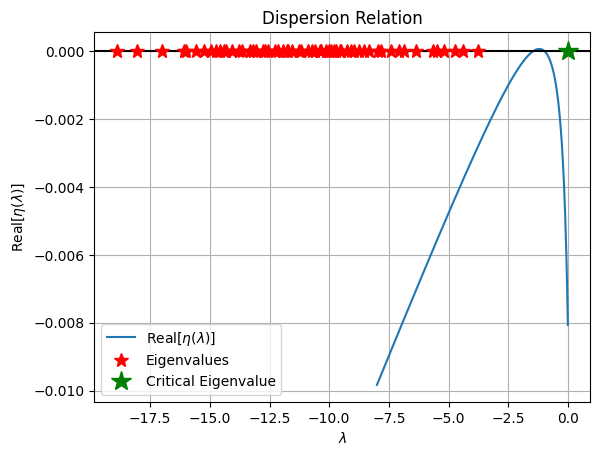

/tmp/ipykernel_16014/2672861779.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ipr_eigenvector = np.sum(critical_eigenvector**4) / (np.sum(critical_eigenvector**2)**2)


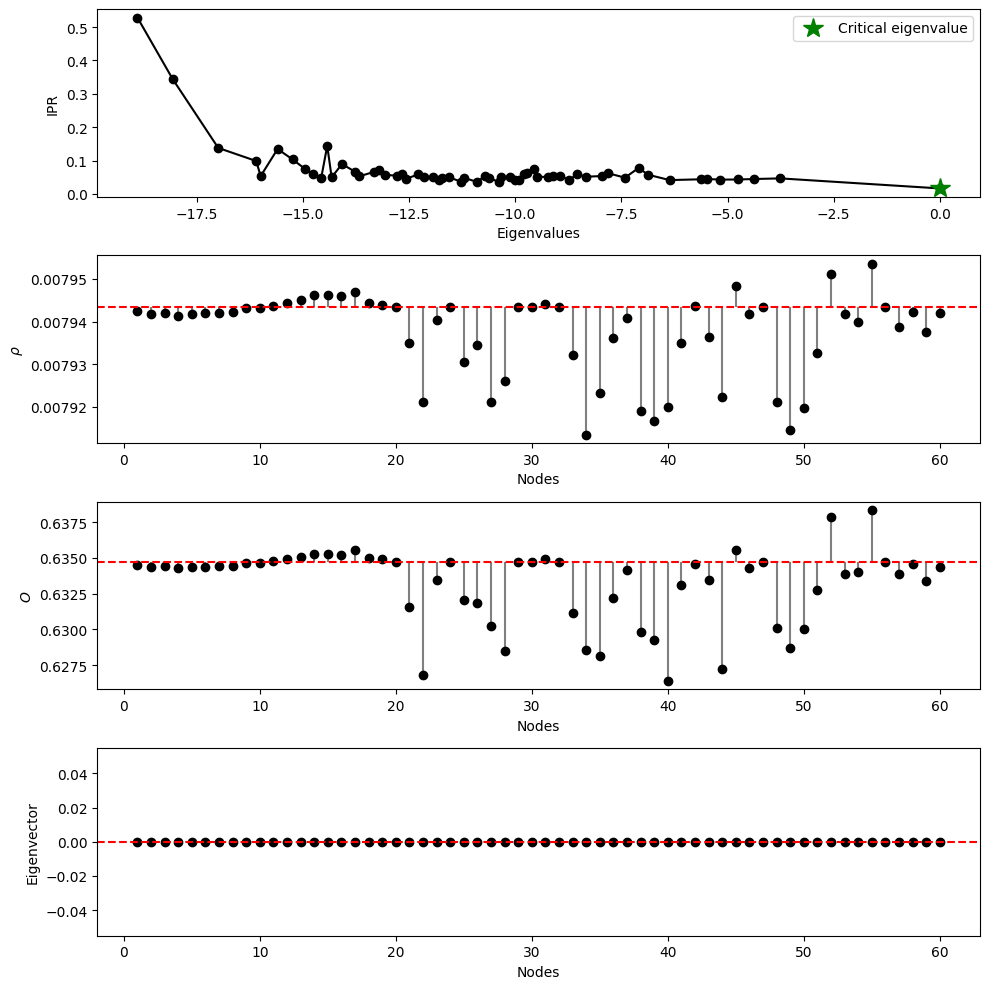

Computations finished.


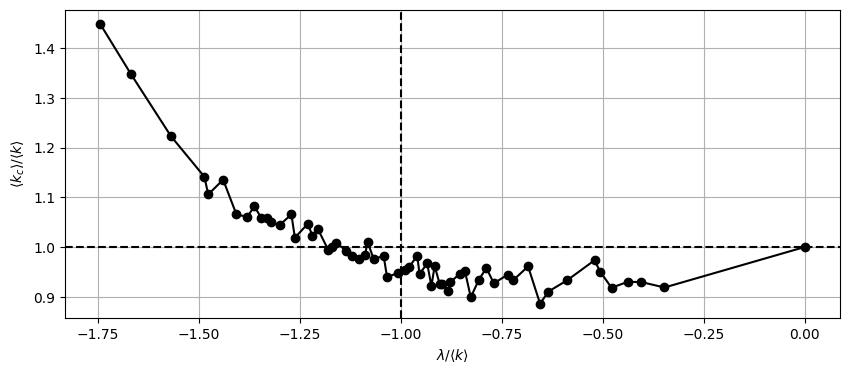

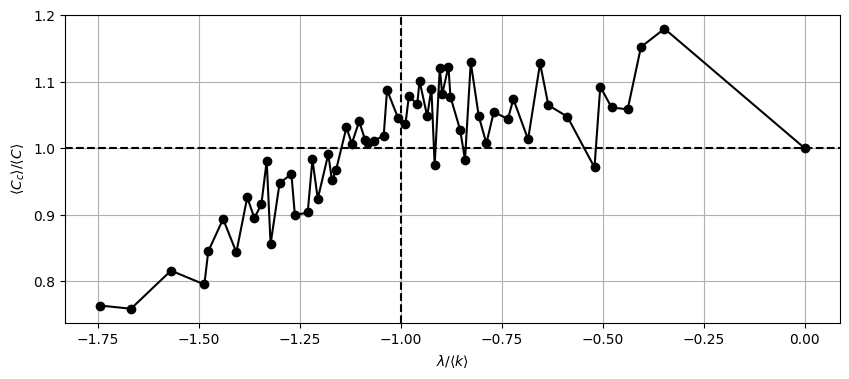

In [ ]:
dyn_1 = get_dynamics(graph, params, plot=True)